In [1]:
%matplotlib inline

# Import custom scripts

In [2]:
path_scripts = '/Users/simjoo/Projects/10X_Skin/scripts/'

In [3]:
import sys
sys.path.append(path_scripts)

In [4]:
from Skin10X_misc_scripts_v1_4 import *
from Skin10X_plot_v1_0 import *
from Skin10X_affinity_propagation_v1_4 import *
from Skin10X_mann_whitney_u_v1_3 import *
from Skin10X_pseudotemporal_ordering_v1_3 import *

/Users/simjoo/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
import csv
import os
import scipy.io
import pickle
import scanpy.api as sc

In [6]:
#exp_id = create_ID()

In [7]:
exp_id = '201806201840'
path_input = '/Users/simjoo/Projects/10X_Skin/data_input/v1.5'
path_output = '/Users/simjoo/Projects/10X_Skin/data_output/v1.5'
path_figures = '/Users/simjoo/Projects/10X_Skin/figures/v1.5'

# Initialize engines

In [8]:
from ipyparallel import Client

In [9]:
c = Client()

In [10]:
dview = c[:]

In [11]:
dview.execute('import sys')
dview.execute('sys.path.append("/Users/simjoo/Projects/10X_Skin/scripts/")')
dview.execute('from Skin10X_affinity_propagation_v1_4 import *')
dview.execute('Skin10X_mann_whitney_u_v1_4 import *')

<AsyncResult: execute>

# Import and compile validation data from CellRanger output

In [12]:
T1 = sc.read_10x_h5('%s/%s' % (path_input, '10X_19_068_filtered_feature_bc_matrix.h5'))
T1.var_names_make_unique()
T1.obs_names = [i[:-1]+'T1' for i in T1.obs_names]
T1.obs['stage'] = 'telogen'
T1.obs['time'] = 'P61'
T1.obs['study'] = 'MK_new'
T1.obs['sex'] = 'f'

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.


In [13]:
T2 = sc.read_10x_h5('%s/%s' % (path_input, '10X_19_070_filtered_feature_bc_matrix.h5'))
T2.var_names_make_unique()
T2.obs_names = [i[:-1]+'T2' for i in T2.obs_names]
T2.obs['stage'] = 'telogen'
T2.obs['time'] = 'P61'
T2.obs['study'] = 'MK_new'
T2.obs['sex'] = 'f'

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.


In [14]:
T3 = sc.read_10x_h5('%s/%s' % (path_input, '10X_19_072_filtered_feature_bc_matrix.h5'))
T3.var_names_make_unique()
T3.obs_names = [i[:-1]+'T3' for i in T3.obs_names]
T3.obs['stage'] = 'telogen'
T3.obs['time'] = 'P61'
T3.obs['study'] = 'MK_new'
T3.obs['sex'] = 'f'

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.


In [15]:
A1 = sc.read_10x_h5('%s/%s' % (path_input, '10X_19_067_filtered_feature_bc_matrix.h5'))
A1.var_names_make_unique()
A1.obs_names = [i[:-1]+'A1' for i in A1.obs_names]
A1.obs['stage'] = 'anagen'
A1.obs['time'] = 'P33'
A1.obs['study'] = 'MK_new'
A1.obs['sex'] = 'f'

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.


In [16]:
A2 = sc.read_10x_h5('%s/%s' % (path_input, '10X_19_069_filtered_feature_bc_matrix.h5'))
A2.var_names_make_unique()
A2.obs_names = [i[:-1]+'A2' for i in A2.obs_names]
A2.obs['stage'] = 'anagen'
A2.obs['time'] = 'P33'
A2.obs['study'] = 'MK_new'
A2.obs['sex'] = 'm'

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.


In [17]:
A3 = sc.read_10x_h5('%s/%s' % (path_input, '10X_19_071_filtered_feature_bc_matrix.h5'))
A3.var_names_make_unique()
A3.obs_names = [i[:-1]+'A3' for i in A3.obs_names]
A3.obs['stage'] = 'anagen'
A3.obs['time'] = 'P33'
A3.obs['study'] = 'MK_new'
A3.obs['sex'] = 'm'

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.


In [18]:
batch_cat = ['10X_19_068',
             '10X_19_070',
             '10X_19_072',
             '10X_19_067',
             '10X_19_069',
             '10X_19_071']

In [21]:
X = T1.concatenate(T2, T3, A1, A2, A3, batch_key='sample', batch_categories=batch_cat, index_unique=None, join='inner')

In [22]:
X.var = X.var.iloc[:,0:3]
X.var.columns = ['gene_ids','feature_types','genome']

In [23]:
X.layers['raw'] = X.X

In [24]:
Counter(X.obs['sample'])

Counter({'10X_19_068': 2161,
         '10X_19_070': 2712,
         '10X_19_072': 2214,
         '10X_19_067': 2383,
         '10X_19_069': 2867,
         '10X_19_071': 4700})

In [25]:
Counter(X.obs['stage'])

Counter({'telogen': 7087, 'anagen': 9950})

## Checkpoint

In [26]:
#X.write_h5ad('%s/%s_X_MKnew_raw.h5' % (path_output, exp_id))

... storing 'sex' as categorical
... storing 'stage' as categorical
... storing 'study' as categorical
... storing 'time' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


# Compile velocyto output from anagen samples

In [238]:
Av1 = sc.read_loom('%s/%s' % (path_input, '10X_19_067.loom'))
Av1.var_names_make_unique()
Av1.obs_names = ['%s-A1' % i.split(':')[1][:-1] for i in Av1.obs_names]
Av1.obs['stage'] = 'anagen'
Av1.obs['time'] = 'P33'
Av1.obs['study'] = 'MK_new'
Av1.obs['sex'] = 'f'

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [239]:
Av2 = sc.read_loom('%s/%s' % (path_input, '10X_19_069.loom'))
Av2.var_names_make_unique()
Av2.obs_names = ['%s-A2' % i.split(':')[1][:-1] for i in Av2.obs_names]
Av2.obs['stage'] = 'anagen'
Av2.obs['time'] = 'P33'
Av2.obs['study'] = 'MK_new'
Av2.obs['sex'] = 'm'

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [240]:
Av3 = sc.read_loom('%s/%s' % (path_input, '10X_19_071.loom'))
Av3.var_names_make_unique()
Av3.obs_names = ['%s-A3' % i.split(':')[1][:-1] for i in Av3.obs_names]
Av3.obs['stage'] = 'anagen'
Av3.obs['time'] = 'P33'
Av3.obs['study'] = 'MK_new'
Av3.obs['sex'] = 'm'

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [241]:
batch_cat = ['10X_19_067',
             '10X_19_069',
             '10X_19_071',]

In [242]:
V = Av1.concatenate(Av2, Av3,
                   batch_key='sample', batch_categories=batch_cat, index_unique=None, join='inner')

In [243]:
V.var = V.var.iloc[:,0:5]
V.var.columns = ['Accession','Chromosome','End','Start','Strand']

## Checkpoint

In [244]:
V.write_h5ad('%s/%s_V.h5' % (path_output, exp_id))

... storing 'sex' as categorical
... storing 'stage' as categorical
... storing 'study' as categorical
... storing 'time' as categorical
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


In [245]:
V.write_loom('%s/%s_V.loom' % (path_output, exp_id))

# Size factor normalization of full dataset

In [12]:
X = sc.read_h5ad('%s/%s_X_MKnew_raw.h5' % (path_output, exp_id))

In [13]:
Xpd = sc2pd(X, 'raw')

## Filter genes (mean expression: 0.1 molecules)

In [14]:
Xpd_sel = dropNull_v2X(Xpd, None, cutoff_mean=0.1)


Dropping unexpressed genes from dataset


In [15]:
np.shape(Xpd_sel)

(8897, 17037)

## Run computeSumFactors in R in chunks (due to performance issues)

In [16]:
ixs = list(Xpd_sel.columns)
np.random.shuffle(ixs)
chnks = [i for i in chunks(ixs, 8600)]

In [17]:
#for i, c in enumerate(chnks):
    #saveData_to_h5_v1(Xpd_sel[c], path_output, exp_id, 'Xpd_prelim%s' % i)

In [18]:
sf = pd.Series(index = Xpd_sel.columns)

for i in range(2):
    sf_tmp = pd.Series(loadData_v1(path_output, exp_id, 'sf_MKnew_prelim%s' %i , 'DataFrame'))
    sf[sf_tmp.index] = sf_tmp.values

In [19]:
X.obs['sf_prelim'] = sf[X.obs_names]

## Remove cells with size factor < 0.1 (low quality cells)

In [20]:
len(sf)

17037

In [21]:
np.sum(sf<0.1)

6011

In [22]:
sf = sf[sf>=0.1]

In [23]:
len(sf)

11026

## Normalize

In [24]:
Xpd_sf = Xpd[sf.index] / sf

In [25]:
Xpd_sf_log2 = np.log2(Xpd_sf + 1)

In [26]:
X = X[Xpd_sf.columns,:]

In [27]:
X.layers['norm'] = scipy.sparse.csr_matrix(Xpd_sf[X.obs_names].loc[X.var_names].T)
X.layers['norm_log'] = scipy.sparse.csr_matrix(Xpd_sf_log2[X.obs_names].loc[X.var_names].T)

## Checkpoint

In [28]:
#X.write_h5ad('%s/%s_X_MKnew.h5' % (path_output, exp_id))

# 1st level clustering of full dataset

In [12]:
X = sc.read_h5ad('%s/%s_X_Mknew.h5' % (path_output, exp_id))

## Feature selection


Dropping unexpressed genes from dataset

After mean expression cutoff of 0.025, 12517 genes remain

After high variance feature selection, 2500 genes remain


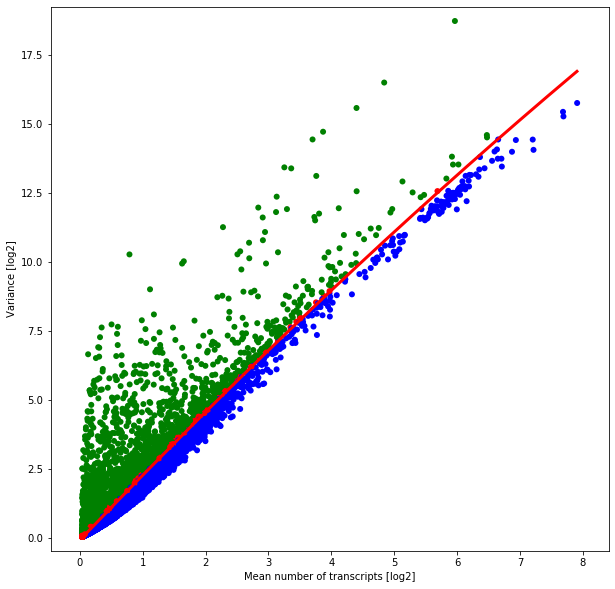

In [13]:
g_sel = select_features_log2_var_polyfit_v2(sc2pd(X, 'raw'), 0.025, 2500).index

In [14]:
Xs = X[:,g_sel]

In [15]:
Xs.X = Xs.layers['norm_log']

## Dimensionality reduction

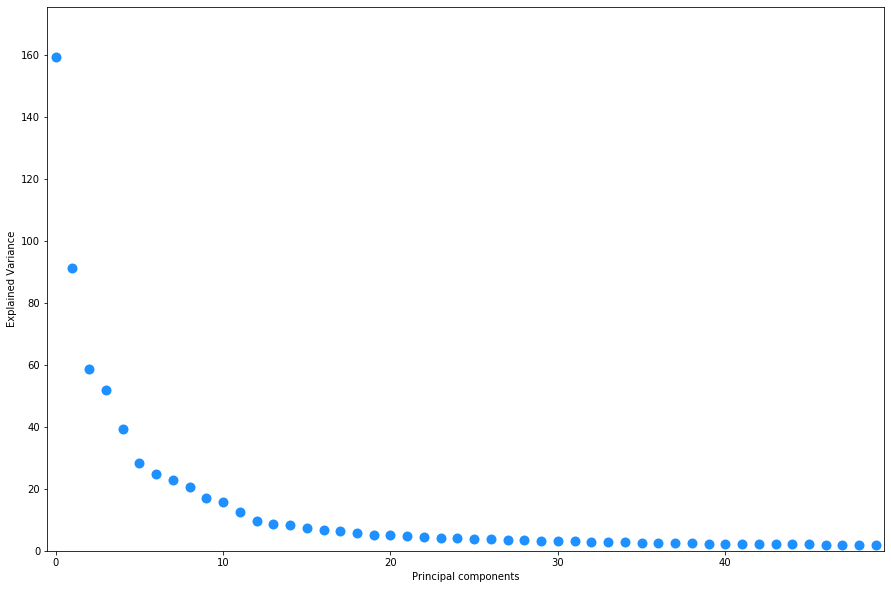

In [16]:
pca_explained_var(sc2pd(Xs,'norm_log'))

In [17]:
sc.pp.pca(Xs, n_comps = 50)

## k nearest neighbors

In [18]:
sc.pp.neighbors(Xs, n_neighbors=30, n_pcs=20, metric='euclidean')

## UMAP

In [19]:
sc.tl.umap(Xs, min_dist=0.5, spread=2)

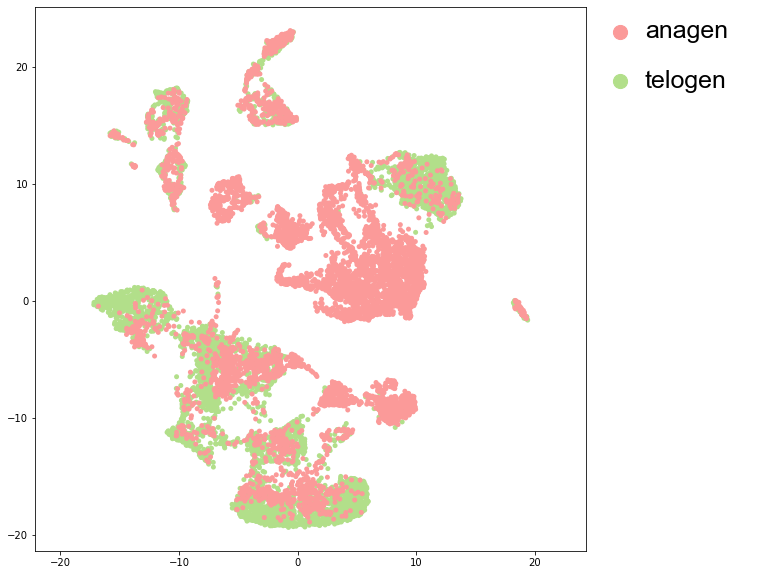

In [37]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['stage'], 
                    {'telogen':'#b2df8a', 'anagen':'#fb9a99'}, s=25)

## Leiden clustering

In [38]:
sc.tl.leiden(Xs, resolution = 0.5)

In [39]:
len(set(Xs.obs['leiden']))

18

In [40]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['leiden'], 
                    s=25)

In [41]:
Xs.obs['cl_prelim'] = Xs.obs['leiden']

## Note in this dataset: this dataset contains quite a few low quality cells which made the CellRanger filtering threshold. These cells often cluster together into clusters with no or weak specific signatures. They furthermore can be easily distinguished by low size factors. These cells will manually be filtered out during analysis.

In [45]:
expr = Xs.obs['sf_prelim']
draw_scatter_expr(Xs.obsm['X_umap'],
                  expr,
                  0,
                  1,
                  text = 'sf_prelim',
                  s = 25)

## Remove low quality clusters #3, #5, #8 and #13 

In [46]:
c_sel = Xs.obs['cl_prelim'][~Xs.obs['cl_prelim'].isin(['3','5','8','13'])].index

In [47]:
Xs = Xs[c_sel]
X = X[c_sel]

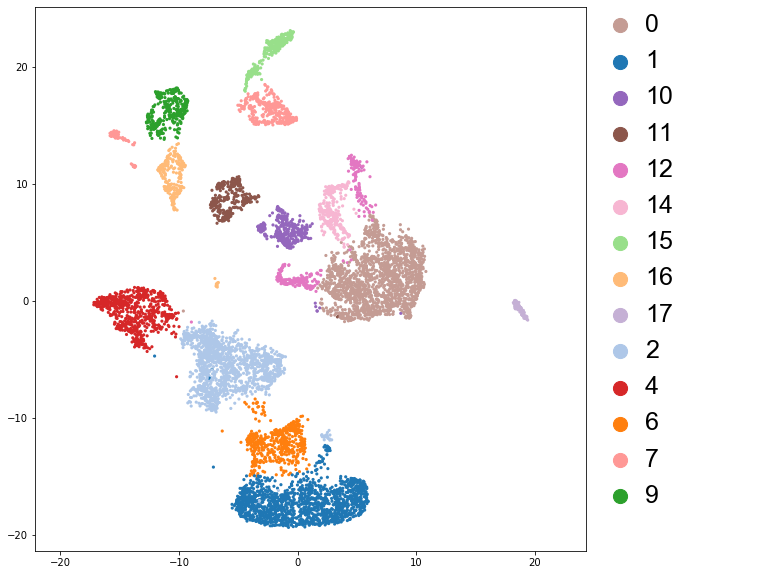

In [48]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['leiden'], 
                    s=10)

# Size factor normalization on clusters

## NB: Will mainly be used to detect low quality cells in the cluster context

In [49]:
Xpd = sc2pd(X, 'raw')[Xs.obs_names]

In [101]:
#for cl in set(Xs.obs['cl_prelim']):
    #c_tmp = Xs.obs['cl_prelim'][Xs.obs['cl_prelim']==cl].index
    #g_tmp = MWU_select_features(Xpd, Xs.obs['cl_prelim'][c_tmp], 0.1)
    #saveData_to_h5_v1(Xpd.loc[g_tmp,c_tmp], path_output, exp_id, 'Xpd_MKnew_1st_cl%s' % cl)

In [ ]:
sf = pd.Series(index = Xpd.columns)

for i in set(Xs.obs['cl_prelim']):
    sf_tmp = pd.Series(loadData_v1(path_output, exp_id, 'sf_MKnew_1st_cl%s' %i , 'DataFrame'))
    sf[sf_tmp.index] = sf_tmp.values

In [ ]:
Xs.obs['sf_1st'] = sf[Xs.obs_names]
X.obs['sf_1st'] = sf[X.obs_names]

In [ ]:
expr = Xs.obs['sf_1st']
draw_scatter_expr(Xs.obsm['X_umap'],
                  expr,
                  0,
                  1,
                  text = 'sf_1st',
                  s = 25)

## Normalize

In [ ]:
Xpd = sc2pd(X, 'raw')[Xs.obs_names]

In [ ]:
Xpd_sf = Xpd[sf.index] / sf
Xpd_sf_log2 = np.log2(Xpd_sf + 1)

In [ ]:
X.layers['norm_incl'] = scipy.sparse.csr_matrix(Xpd_sf[X.obs_names].loc[X.var_names].T)
X.layers['norm_incl_log'] = scipy.sparse.csr_matrix(Xpd_sf_log2[X.obs_names].loc[X.var_names].T)

## Groups clusters according to main cell compartments in skin (e.g. fibroblasts, keratinocytes etc.)

In [ ]:
cl_1st = pd.Series(None, index = Xs.obs['leiden'].index)

#permanent epidermis

c_EPI = Xs.obs['leiden'][Xs.obs['leiden'].isin(['1','2','4','6'])].index
cl_1st[c_EPI] = 'EPI'

#anagen HF

c_ANA = Xs.obs['leiden'][Xs.obs['leiden'].isin(['0','10','11','12','14'])].index
cl_1st[c_ANA] = 'ANA'

#fibroblasts

c_FIB = Xs.obs['leiden'][Xs.obs['leiden'].isin(['9','16'])].index
cl_1st[c_FIB] = 'FIB'

#immune cells

c_IMM = Xs.obs['leiden'][Xs.obs['leiden'].isin(['7','15'])].index
cl_1st[c_IMM] = 'IMM'

#vascular cells

c_VASC = Xs.obs['leiden'][Xs.obs['leiden'].isin([])].index
cl_1st[c_VASC] = 'VASC'

#neural crest derived cells

c_NC = Xs.obs['leiden'][Xs.obs['leiden'].isin([])].index
cl_1st[c_NC] = 'NC'

#miscellaneous populations

c_MISC = Xs.obs['leiden'][Xs.obs['leiden'].isin(['17'])].index
cl_1st[c_MISC] = 'MISC'

In [ ]:
Counter(cl_1st)

In [ ]:
Xs.obs['cl_1st'] = cl_1st[Xs.obs_names]
X.obs['cl_1st'] = cl_1st[X.obs_names]

In [ ]:
cmap_1st = {'EPI':'#1b9e77',
            'ANA':'#d95f02',
            'FIB':'#7570b3',
            'IMM':'#e7298a',
            'VASC':'#66a61e',
            'NC':'#e6ab02',
            'MISC':'#666666'}

In [ ]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['cl_1st'],
                    cmap_1st,
                    s=10)

## Checkpoint

In [ ]:
#X.write_h5ad('%s/%s_X_MKnew_1st.h5' % (path_output, exp_id))
#Xs.write_h5ad('%s/%s_Xs_MKnew_1st.h5' % (path_output, exp_id))

# 2nd level clustering - permanent epidermis

In [111]:
X_1st = sc.read_h5ad('%s/%s_X_MKnew_1st.h5' % (path_output, exp_id))

## Select permanent epidermis cells

In [112]:
c_sel_EPI = X_1st.obs['cl_1st'][X_1st.obs['cl_1st']=='EPI'].index

In [113]:
len(c_sel_EPI)

4107

In [114]:
X = X_1st[c_sel_EPI]

## Remove doublets of keratinocytes and immune cells based on known immune markers

In [115]:
c_rem_EPI = remove_cells(sc2pd(X, 'norm'), 
                         ['Ptprc','Cd207','Cd74','Cd3e','Cd52','Cd83'], 
                         [1,2,25,2,2,2])

In [116]:
len(c_rem_EPI)

50

In [117]:
cl_1st_tmp = pd.Series(X_1st.obs['cl_1st'], index = X_1st.obs_names).astype(str)
cl_1st_tmp[c_rem_EPI] = 'JUNK'

In [118]:
c_sel_EPI = [c for c in c_sel_EPI if c not in c_rem_EPI]

In [119]:
len(c_sel_EPI)

4057

In [120]:
X = X[c_sel_EPI]

## Remove cells with incluster size factor < 0.25 (low quality cells)

In [121]:
sf_EPI = X.obs['sf_1st']

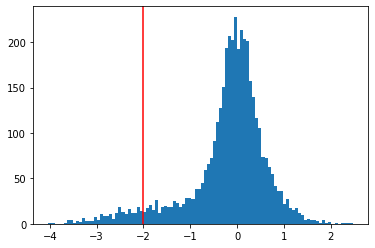

In [122]:
plt.hist(np.log2(sf_EPI[sf_EPI>0]), bins = 100)
plt.axvline(np.log2(0.25), color = 'red')

In [123]:
len(sf_EPI)

4057

In [126]:
c_rem = sf_EPI[sf_EPI<0.25].index
c_sel = sf_EPI[sf_EPI>=0.25].index

In [129]:
len(c_rem)

219

In [127]:
len(c_sel)

3838

In [128]:
X = X[c_sel]

In [130]:
cl_1st_tmp[c_rem] = 'JUNK'

## Feature selection


Dropping unexpressed genes from dataset

After mean expression cutoff of 0.025, 11444 genes remain

After high variance feature selection, 2500 genes remain


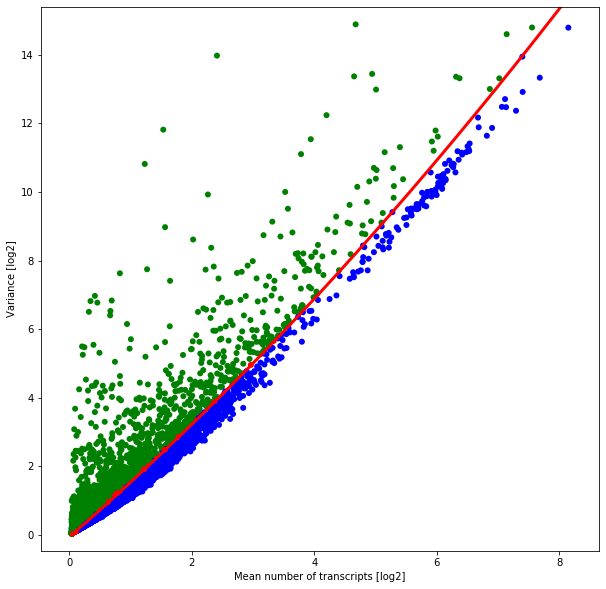

In [132]:
g_sel = select_features_log2_var_polyfit_v2(sc2pd(X, 'raw'), 0.025, 2500).index

In [133]:
Xs = X[:,g_sel]

In [134]:
Xs.X = Xs.layers['norm_log']

## Dimensionality reduction

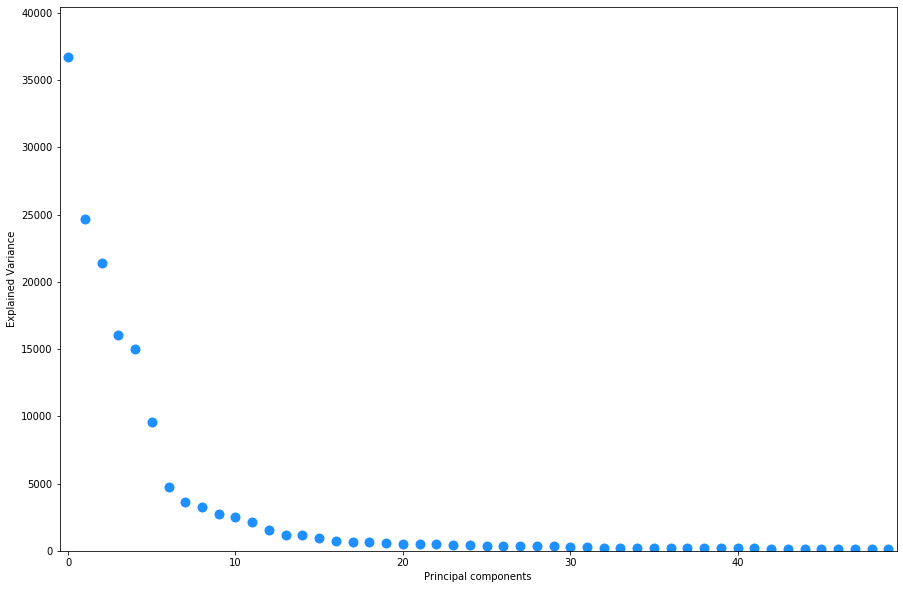

In [135]:
pca_explained_var(sc2pd(Xs,'norm_log'))

In [136]:
sc.pp.pca(Xs, n_comps = 50)

## k nearest neighbors

In [137]:
sc.pp.neighbors(Xs, n_neighbors=30, n_pcs=15, metric='euclidean')

## UMAP

In [138]:
sc.tl.umap(Xs, min_dist=1, spread=2)

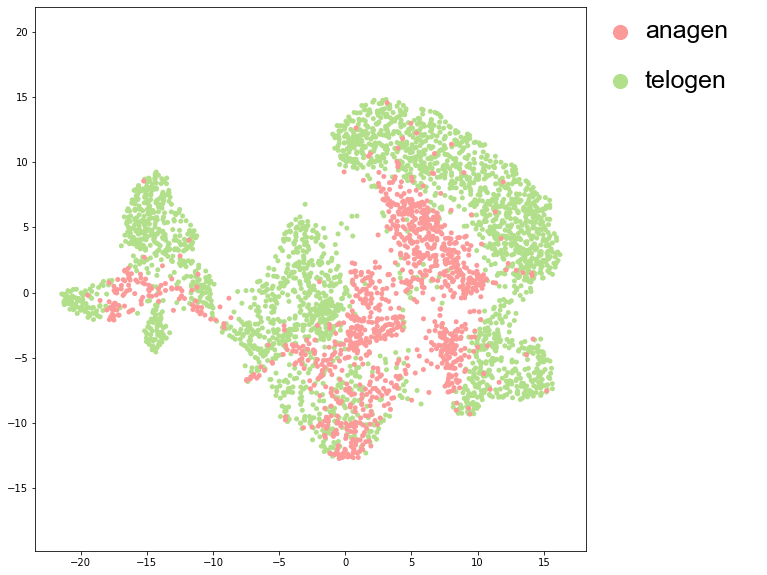

In [139]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['stage'], 
                    {'telogen':'#b2df8a', 'anagen':'#fb9a99'}, s=25)

## Leiden clustering

In [140]:
sc.tl.leiden(Xs, resolution = 0.4)

In [141]:
len(set(Xs.obs['leiden']))

9

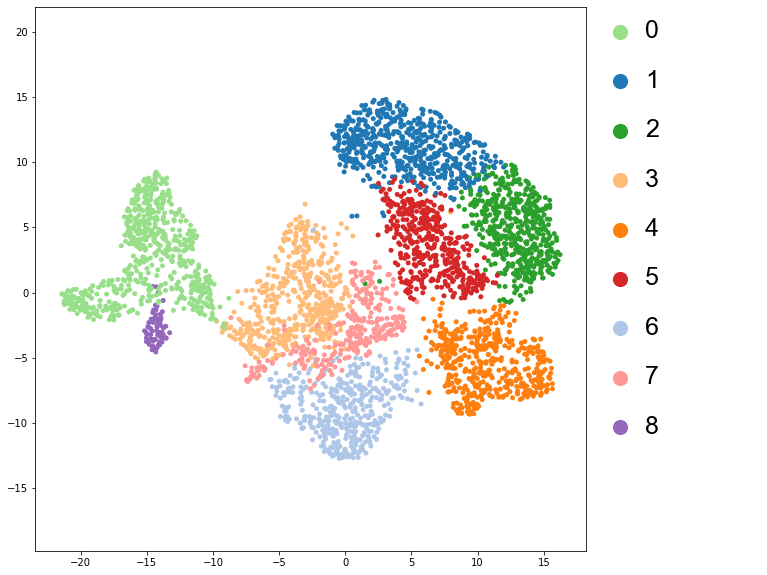

In [142]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['leiden'], 
                    s=25)

In [143]:
Xs.obs['cl_prelim'] = Xs.obs['leiden']

## Assign clusters according to identity (based on typical markers from the main dataset)

### NB: SG and cycling cells are present in dataset, but too rare to form own clusters.

In [144]:
cl_2nd_EPI = pd.Series(None, index = Xs.obs['leiden'].index)

# IFE basal

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['1','2','5'])].index
cl_2nd_EPI[c_sel] = 'EPI - IFE B'

# IFE suprabasal

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['4'])].index
cl_2nd_EPI[c_sel] = 'EPI - IFE SB'

# uHF basal 

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['3','7'])].index
cl_2nd_EPI[c_sel] = 'EPI - UHF B'

# uHF suprabasal

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['6'])].index
cl_2nd_EPI[c_sel] = 'EPI - UHF SB'

# Bulge (likely both OB and IB)

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['0'])].index
cl_2nd_EPI[c_sel] = 'EPI - OB'

# Hair germ

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['8'])].index
cl_2nd_EPI[c_sel] = 'EPI - HG'

In [145]:
Counter(cl_2nd_EPI)

Counter({'EPI - IFE B': 1510,
         'EPI - UHF SB': 401,
         'EPI - IFE SB': 471,
         'EPI - UHF B': 802,
         'EPI - OB': 588,
         'EPI - HG': 66})

In [146]:
X.obs['cl_2nd_EPI'] = cl_2nd_EPI
Xs.obs['cl_2nd_EPI'] = cl_2nd_EPI

In [147]:
cmap_EPI = {'EPI - IFE B': '#7fbc41',
            'EPI - IFE SB': '#ff7f00',
            'EPI - UHF B': '#cab2d6',
            'EPI - UHF SB': '#6a3d9a',
            'EPI - OB': '#1f78b4',
            'EPI - HG': '#a6cee3',
            'None':'silver'}

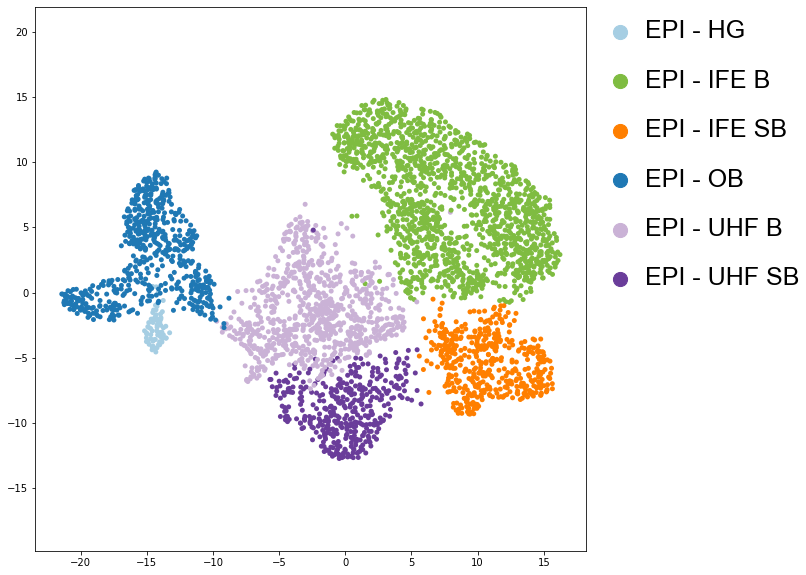

In [148]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['cl_2nd_EPI'],
                    cmap_EPI,
                    s=25)

## Checkpoint

In [149]:
#X.write_h5ad('%s/%s_X_MKnew_2nd_EPI.h5' % (path_output, exp_id))
#Xs.write_h5ad('%s/%s_Xs_MKnew_2nd_EPI.h5' % (path_output, exp_id))

... storing 'cl_2nd_EPI' as categorical
... storing 'cl_2nd_EPI' as categorical


## Update X_1st

In [150]:
X_1st.obs['cl_1st'] = cl_1st_tmp

In [151]:
#X_1st.write_h5ad('%s/%s_X_MKnew_1st.h5' % (path_output, exp_id))

... storing 'cl_1st' as categorical


## Create UMAP informed by main dataset (init)

In [ ]:
X = 

# 2nd level clustering - anagen HF

In [152]:
X_1st = sc.read_h5ad('%s/%s_X_MKnew_1st.h5' % (path_output, exp_id))

## Select anagen HF cells

In [153]:
c_sel_ANA = X_1st.obs['cl_1st'][X_1st.obs['cl_1st']=='ANA'].index

In [154]:
len(c_sel_ANA)

3112

In [155]:
X = X_1st[c_sel_ANA]

## Remove doublets of keratinocytes and immune cells based on known immune markers

In [156]:
c_rem_ANA = remove_cells(sc2pd(X, 'norm'), 
                         ['Ptprc','Cd207','Cd74','Cd3e','Cd52','Cd83'], 
                         [1,2,25,2,2,2])

In [157]:
len(c_rem_ANA)

22

In [158]:
cl_1st_tmp = pd.Series(X_1st.obs['cl_1st'], index = X_1st.obs_names).astype(str)
cl_1st_tmp[c_rem_ANA] = 'JUNK'

In [159]:
c_sel_ANA = [c for c in c_sel_ANA if c not in c_rem_ANA]

In [160]:
len(c_sel_ANA)

3090

In [161]:
X = X[c_sel_ANA]

## Remove cells with incluster size factor < 0.25 (low quality cells)

In [162]:
sf_ANA = X.obs['sf_1st']

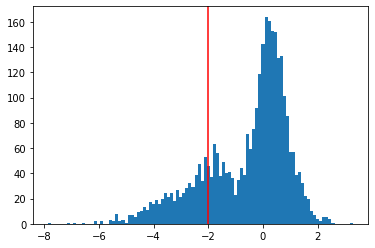

In [163]:
plt.hist(np.log2(sf_ANA[sf_ANA>0]), bins = 100)
plt.axvline(np.log2(0.25), color = 'red')

In [164]:
len(sf_ANA)

3090

In [165]:
c_rem = sf_ANA[sf_ANA<0.25].index
c_sel = sf_ANA[sf_ANA>=0.25].index

In [166]:
len(c_rem)

624

In [167]:
len(c_sel)

2466

In [168]:
X = X[c_sel]

In [169]:
cl_1st_tmp[c_rem] = 'JUNK'

## Feature selection


Dropping unexpressed genes from dataset

After mean expression cutoff of 0.025, 12290 genes remain

After high variance feature selection, 2500 genes remain


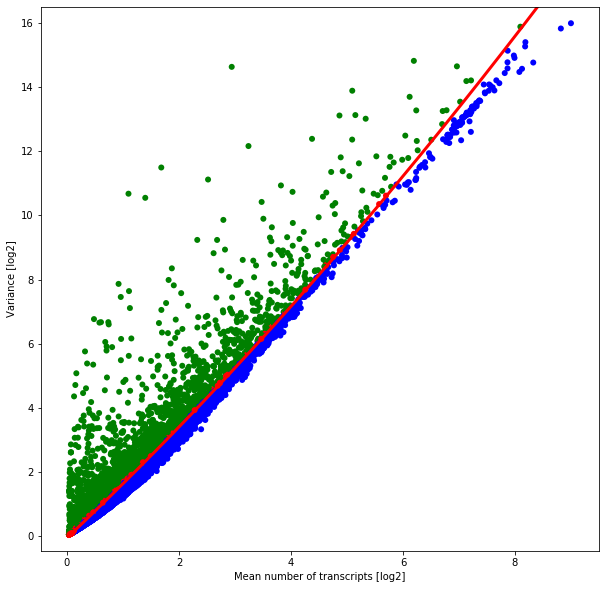

In [170]:
g_sel = select_features_log2_var_polyfit_v2(sc2pd(X, 'raw'), 0.025, 2500).index

In [171]:
Xs = X[:,g_sel]

In [172]:
Xs.X = Xs.layers['norm_log']

## Dimensionality reduction

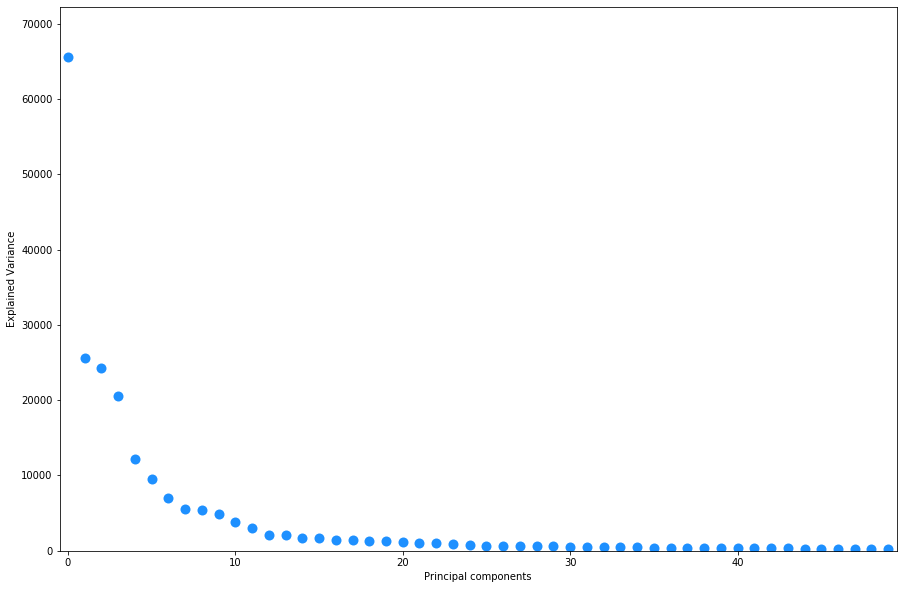

In [173]:
pca_explained_var(sc2pd(Xs,'norm_log'))

In [174]:
sc.pp.pca(Xs, n_comps = 50)

## k nearest neighbors

In [213]:
sc.pp.neighbors(Xs, n_neighbors=50, n_pcs=15, metric='euclidean')

## UMAP

In [214]:
sc.tl.umap(Xs, min_dist=1, spread=3)

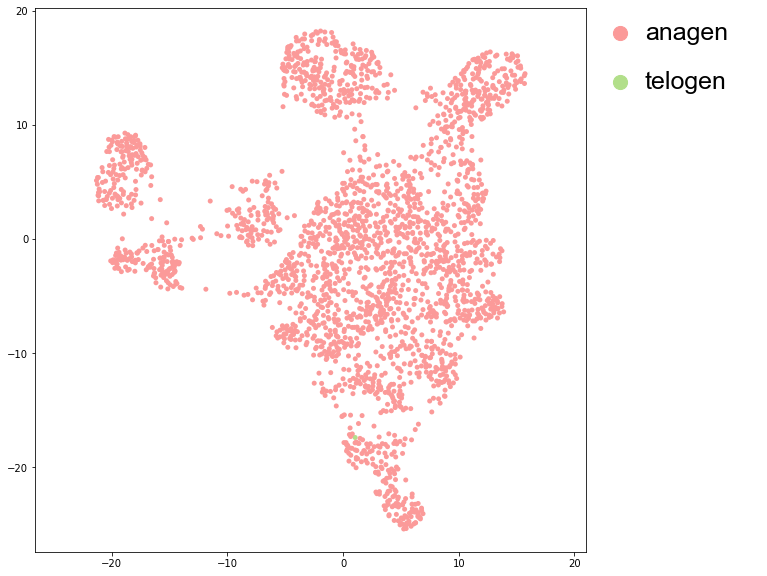

In [215]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['stage'], 
                    {'telogen':'#b2df8a', 'anagen':'#fb9a99'}, s=25)

## Leiden clustering

In [219]:
sc.tl.leiden(Xs, resolution = 0.5)

In [220]:
len(set(Xs.obs['leiden']))

9

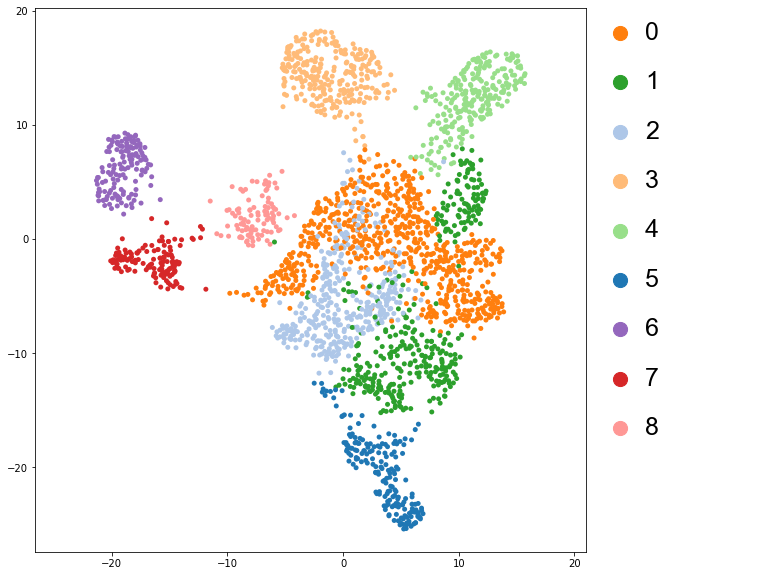

In [221]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['leiden'], 
                    s=25)

## Cluster 8 shows almost no specific signature signature (except for low level expression of Cdh13 [found mostly in bulge and UHF] and Krt80). Also contains many cells with low-level signatures from other anagen HF populations (IRS, Cortex, Medulla etc.). Most likely doublets or low quality cells. 

In [244]:
c_sel = Xs.obs['leiden'][Xs.obs['leiden']!='8'].index
c_rem = Xs.obs['leiden'][Xs.obs['leiden']=='8'].index

In [245]:
X = X[c_sel]
Xs = Xs[c_sel]

In [246]:
cl_1st_tmp[c_rem] = 'JUNK'

## Dimensionality reduction II

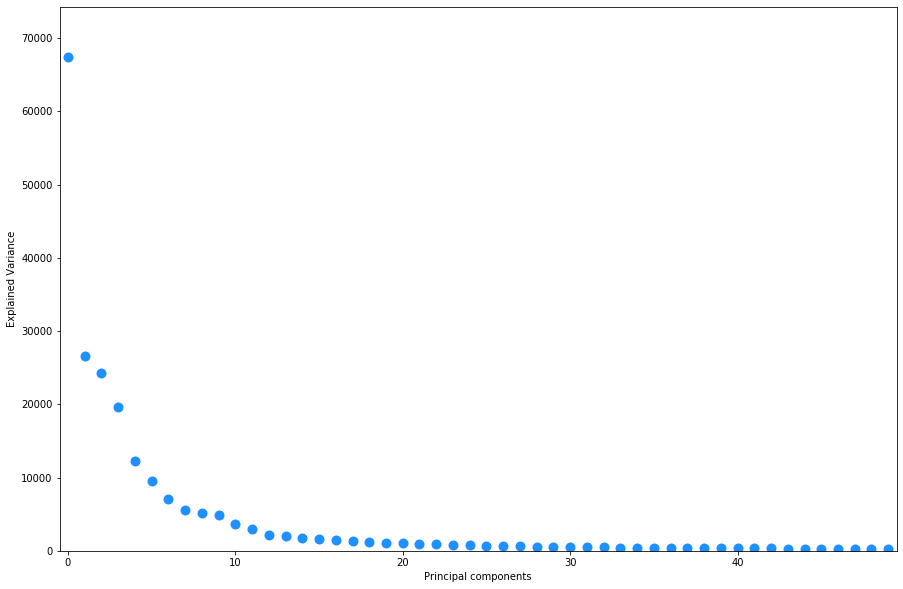

In [247]:
pca_explained_var(sc2pd(Xs,'norm_log'))

In [248]:
sc.pp.pca(Xs, n_comps = 50)

## k nearest neighbors II

In [249]:
sc.pp.neighbors(Xs, n_neighbors=50, n_pcs=15, metric='euclidean')

## UMAP II

In [250]:
sc.tl.umap(Xs, min_dist=1, spread=3)

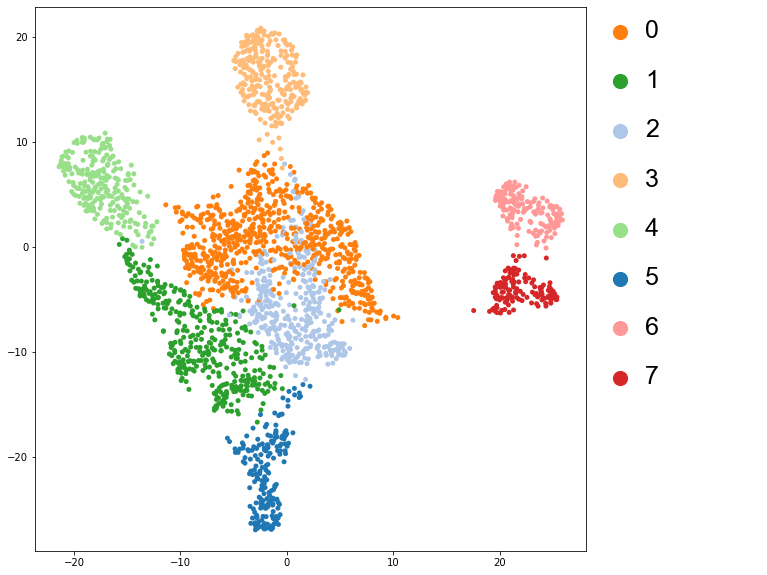

In [251]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['leiden'], 
                    s=25)

## Assign clusters according to identity (based on typical markers from the main dataset)

In [260]:
cl_2nd_ANA = pd.Series(None, index = Xs.obs['leiden'].index)

# outer layer cluster 1 containing Cp and "hook"

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['6'])].index
cl_2nd_ANA[c_sel] = 'ANA - OL1'

# outer layer cluster 2 containing LPC

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['7'])].index
cl_2nd_ANA[c_sel] = 'ANA - OL2'

# germinative layer and early inner layers

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['0','1','2'])].index
cl_2nd_ANA[c_sel] = 'ANA - GL'

# intermediate and terminal IRS

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['5'])].index
cl_2nd_ANA[c_sel] = 'ANA - IRS'

# intermediate and terminal cortex / cuticle

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['4'])].index
cl_2nd_ANA[c_sel] = 'ANA - CX'

# intermediate and terminal medulla

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['3'])].index
cl_2nd_ANA[c_sel] = 'ANA - MED'

In [261]:
Counter(cl_2nd_ANA)

Counter({'ANA - IRS': 186,
         'ANA - GL': 1386,
         'ANA - MED': 270,
         'ANA - CX': 245,
         'ANA - OL2': 133,
         'ANA - OL1': 146})

In [262]:
X.obs['cl_2nd_ANA'] = cl_2nd_ANA
Xs.obs['cl_2nd_ANA'] = cl_2nd_ANA

In [265]:
cmap_ANA = {'ANA - OL1': '#018571',
            'ANA - OL2': '#0571b0',
            'ANA - GL': '#c2a5cf',
            'ANA - IRS': '#ca0020',
            'ANA - CX': '#008837',
            'ANA - MED': '#a6611a',}

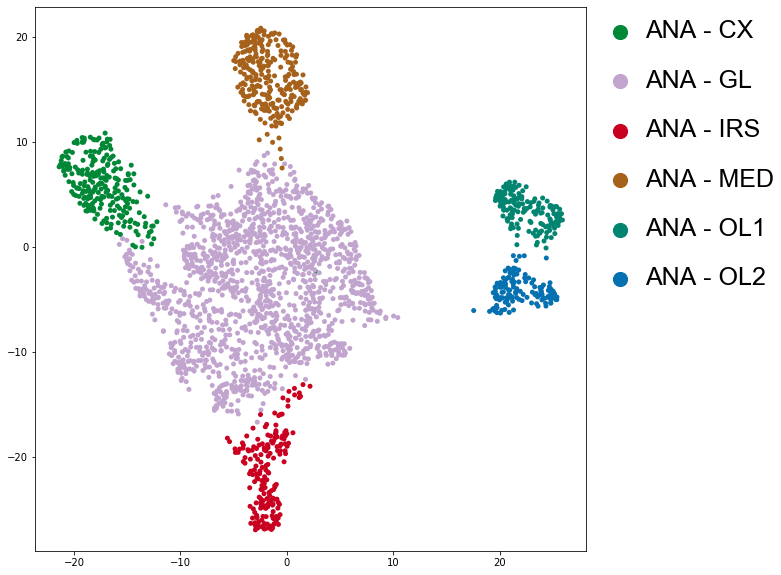

In [266]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['cl_2nd_ANA'],
                    cmap_ANA,
                    s=25)

## Checkpoint

In [267]:
#X.write_h5ad('%s/%s_X_MKnew_2nd_ANA.h5' % (path_output, exp_id))
#Xs.write_h5ad('%s/%s_Xs_MKnew_2nd_ANA.h5' % (path_output, exp_id))

... storing 'cl_2nd_ANA' as categorical
... storing 'cl_2nd_ANA' as categorical


## Update X_1st

In [268]:
X_1st.obs['cl_1st'] = cl_1st_tmp

In [269]:
#X_1st.write_h5ad('%s/%s_X_MKnew_1st.h5' % (path_output, exp_id))

... storing 'cl_1st' as categorical


# 2nd level clustering - outer layers

In [31]:
X = sc.read_h5ad('%s/%s_X_MKnew_2nd_ANA.h5' % (path_output, exp_id))
Xs = sc.read_h5ad('%s/%s_Xs_MKnew_2nd_ANA.h5' % (path_output, exp_id))

In [32]:
c_sel = Xs.obs['cl_2nd_ANA'][Xs.obs['cl_2nd_ANA'].isin(['ANA - OL1','ANA - OL2'])].index

In [33]:
X = X[c_sel]
Xs = Xs[c_sel]

## UMAP

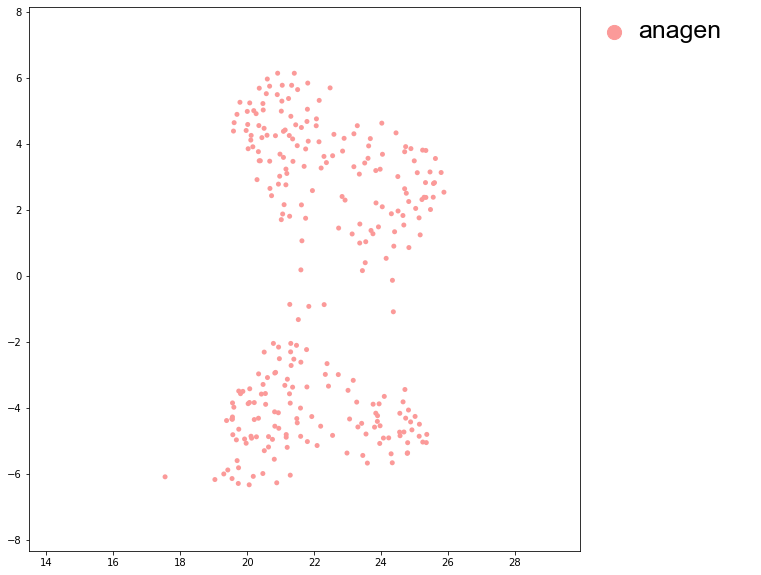

In [34]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['stage'], 
                    {'telogen':'#b2df8a', 'anagen':'#fb9a99'}, s=25)

## RNA velocity of outer layers (using similar parameters as for main dataset)

In [35]:
import velocyto as vcy

In [36]:
vcy.__version__

'0.17.16'

In [37]:
Vcy = vcy.VelocytoLoom('%s/%s_%s' % (path_output, exp_id, 'V.loom'))

In [38]:
Vcy.ca['CellID'] = Vcy.ca['obs_names']
Vcy.ra['Gene'] = Vcy.ra['var_names']

In [39]:
len(Vcy.ca['CellID'])

9950

## Filter cells

In [40]:
cells_bool = []

for c in Vcy.ca['CellID']:
    if c in c_sel: cells_bool += [True]
    else: cells_bool += [False]

In [46]:
Vcy.filter_cells(np.array(cells_bool))

In [47]:
len(Vcy.ca['CellID'])

279

## Filter data by overall expression

In [48]:
Vcy.score_detection_levels(min_expr_counts = 10, min_expr_counts_U = 1, min_cells_express_U = 1)

In [49]:
np.sum(Vcy.detection_level_selected)

8576

In [50]:
Vcy.filter_genes(by_detection_levels=True)

## Add clustering data

In [51]:
cmap_ANA = {'ANA - OL1': '#018571',
            'ANA - OL2': '#0571b0',
            'ANA - GL': '#c2a5cf',
            'ANA - IRS': '#ca0020',
            'ANA - CX': '#008837',
            'ANA - MED': '#a6611a',}

In [52]:
cells_cl = [Xs.obs['cl_2nd_ANA'][c] for c in Vcy.ca['CellID']]

In [53]:
Vcy.set_clusters(cluster_labels=cells_cl,cluster_colors_dict=cmap_ANA)

## Normalize data

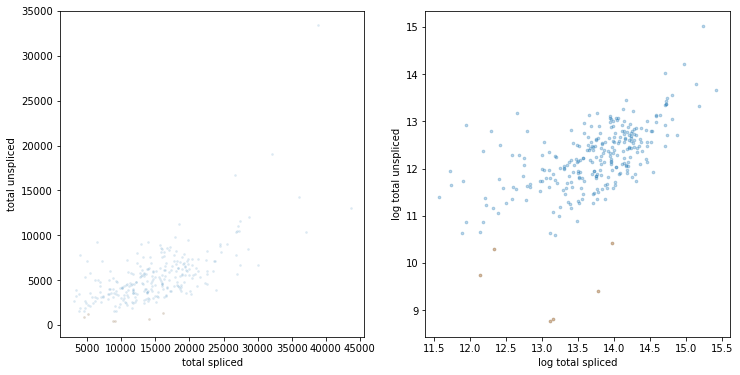

In [54]:
Vcy.normalize_by_total(min_perc_U = 2, plot = True)

In [55]:
Vcy.adjust_totS_totU(skip_low_U_pop = False, fit_with_low_U = False)

## Perform PCA

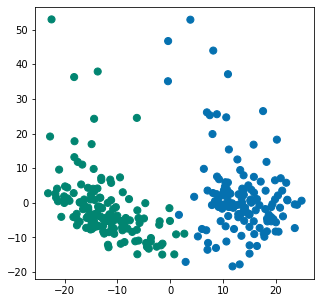

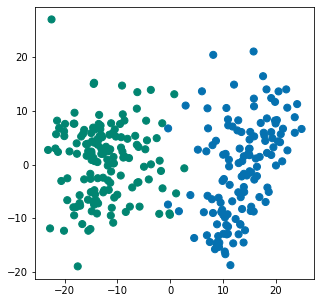

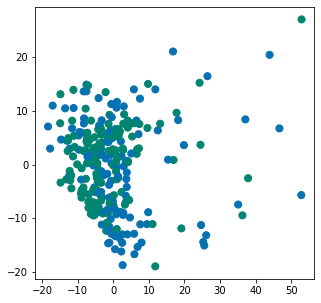

In [56]:
Vcy.perform_PCA(which = 'S_norm', n_components = 15)

velocyto_plot_pca_2d(Vcy, comps = [0,1])
velocyto_plot_pca_2d(Vcy, comps = [0,2])
velocyto_plot_pca_2d(Vcy, comps = [1,2])

## Perform knn imputation

In [57]:
Vcy.pcs = Vcy.pcs.astype('float64')

In [58]:
Vcy.knn_imputation(k = 25, pca_space = True, metric = 'euclidean', size_norm = True, balanced = True)

## Fit gammas

In [59]:
Vcy.fit_gammas(steady_state_bool = None, 
                   use_imputed_data = True, 
                   use_size_norm = False, 
                   fit_offset = True, 
                   fixperc_q = False, 
                   weighted = True, 
                   weights = 'maxmin_diag', 
                   limit_gamma = False)

## Filter genes based on R2 and gamma

In [60]:
Vcy.filter_genes_by_phase_portrait(minR2 = 0.2, min_gamma = 0.01)

In [61]:
len(Vcy.ra['Gene'])

1276

In [62]:
Vcy.predict_U(which_S='Sx')
Vcy.calculate_velocity()
Vcy.calculate_shift(assumption="constant_velocity")
Vcy.extrapolate_cell_at_t(delta_t=1)

### Set UMAP

In [63]:
umap = pd.DataFrame(Xs.obsm['X_umap'], index = Xs.obs_names, columns = [0,1])

In [64]:
Vcy.ts = np.array(umap.loc[Vcy.ca['CellID']])

## Calculate transition probability and embedding shift

In [66]:
Vcy.estimate_transition_prob(hidim="Sx", embed="ts", transform = "log", knn_random = False, n_sight = 100)
Vcy.calculate_embedding_shift(sigma_corr = 0.1, expression_scaling=True)

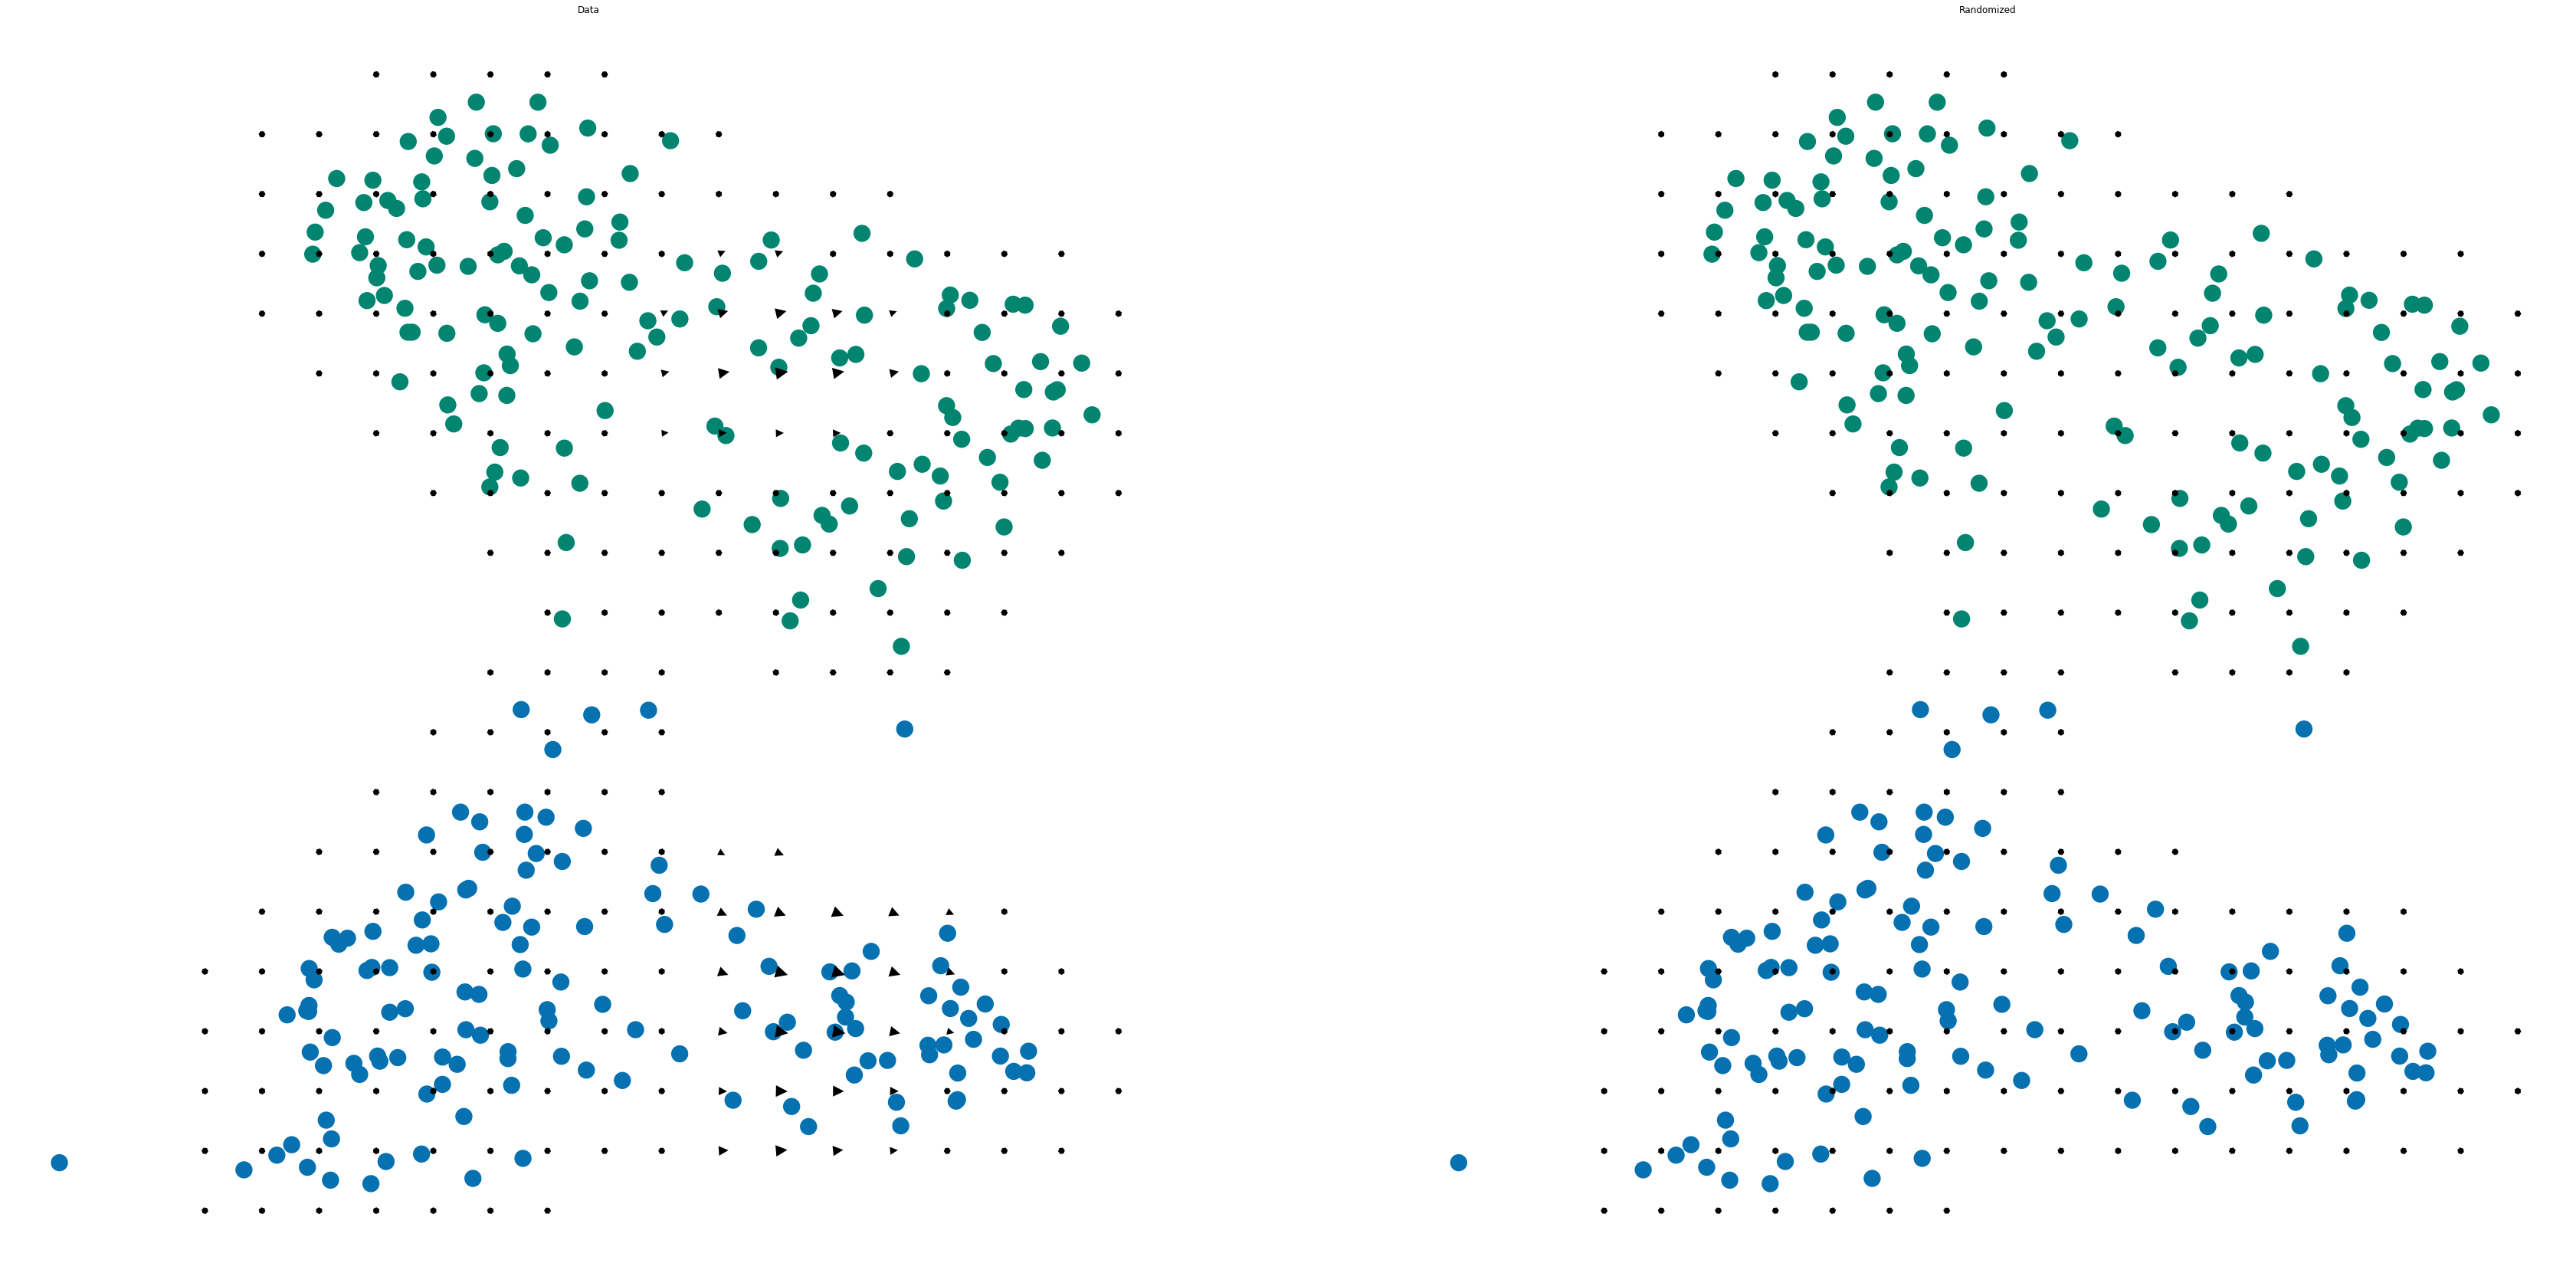

In [69]:
height = 30
width = 30 * 2

fig = plt.figure(facecolor = 'w', figsize = (width, height))

Vcy.calculate_grid_arrows(smooth=1.0, steps=(20, 20), n_neighbors=25)
Vcy.plot_grid_arrows(scatter_kwargs_dict={"alpha":1, "lw":0.0, "edgecolor":"0", "s":500, "rasterized":True}, 
                     min_mass=1, angles='xy', scale_units='xy', plot_random = True,
                     headaxislength=3, headlength=3, headwidth=3, quiver_scale=2)

In [ ]:
## Calculate transition probability and embedding shift

Vcy.estimate_transition_prob(hidim="Sx", embed="ts", transform = "log", knn_random = False, n_sight = 500)
Vcy.calculate_embedding_shift(sigma_corr = 0.1, expression_scaling=True)

height = 30
width = 30 * 2

fig = plt.figure(facecolor = 'w', figsize = (width, height))

Vcy.calculate_grid_arrows(smooth=1.0, steps=(50, 50), n_neighbors=100)
Vcy.plot_grid_arrows(scatter_kwargs_dict={"alpha":1, "lw":0.0, "edgecolor":"0", "s":500, "rasterized":True}, 
                     min_mass=1, angles='xy', scale_units='xy', plot_random = True,
                     headaxislength=3, headlength=3, headwidth=3, quiver_scale=4)

## Checkpoint

In [323]:
X.write_h5ad('%s/%s_X_MKnew_2nd_ANA_OL.h5' % (path_output, exp_id))
Xs.write_h5ad('%s/%s_Xs_MKnew_2nd_ANA_OL.h5' % (path_output, exp_id))

# 2nd level clustering - inner layers

In [200]:
X = sc.read_h5ad('%s/%s_X_MKnew_2nd_ANA.h5' % (path_output, exp_id))
Xs = sc.read_h5ad('%s/%s_Xs_MKnew_2nd_ANA.h5' % (path_output, exp_id))

In [201]:
c_sel = Xs.obs['cl_2nd_ANA'][Xs.obs['cl_2nd_ANA'].isin(['ANA - GL','ANA - IRS','ANA - MED','ANA - CX'])].index

In [202]:
X = X[c_sel]
Xs = Xs[c_sel]

## UMAP

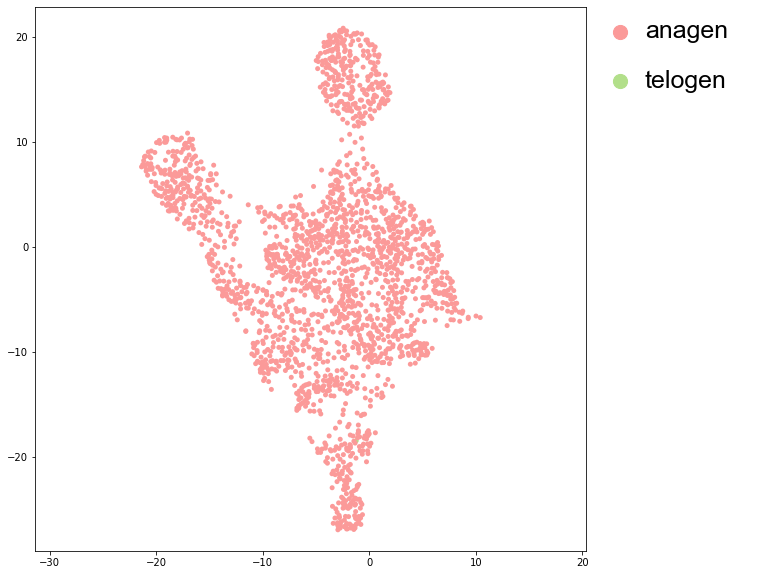

In [203]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['stage'], 
                    {'telogen':'#b2df8a', 'anagen':'#fb9a99'}, s=25)

## RNA velocity of inner layers (using similar parameters as for main dataset)

In [246]:
import velocyto as vcy

In [247]:
vcy.__version__

'0.17.16'

In [248]:
Vcy = vcy.VelocytoLoom('%s/%s_%s' % (path_output, exp_id, 'V.loom'))

In [249]:
Vcy.ca['CellID'] = Vcy.ca['obs_names']
Vcy.ra['Gene'] = Vcy.ra['var_names']

In [250]:
len(Vcy.ca['CellID'])

9950

### Filter cells

In [251]:
cells_bool = []

for c in Vcy.ca['CellID']:
    if c in c_sel: cells_bool += [True]
    else: cells_bool += [False]

In [252]:
Vcy.filter_cells(np.array(cells_bool))

In [253]:
len(Vcy.ca['CellID'])

2086

## Filter data by overall expression

In [255]:
Vcy.score_detection_levels(min_expr_counts = 10, min_expr_counts_U = 1, min_cells_express_U = 1)

In [256]:
np.sum(Vcy.detection_level_selected)

12027

In [257]:
Vcy.filter_genes(by_detection_levels=True)

## Add clustering data

In [262]:
cmap_ANA = {'ANA - OL1': '#018571',
            'ANA - OL2': '#0571b0',
            'ANA - GL': '#c2a5cf',
            'ANA - IRS': '#ca0020',
            'ANA - CX': '#008837',
            'ANA - MED': '#a6611a',}

In [260]:
cells_cl = [Xs.obs['cl_2nd_ANA'][c] for c in Vcy.ca['CellID']]

In [263]:
Vcy.set_clusters(cluster_labels=cells_cl,cluster_colors_dict=cmap_ANA)

## Normalize data

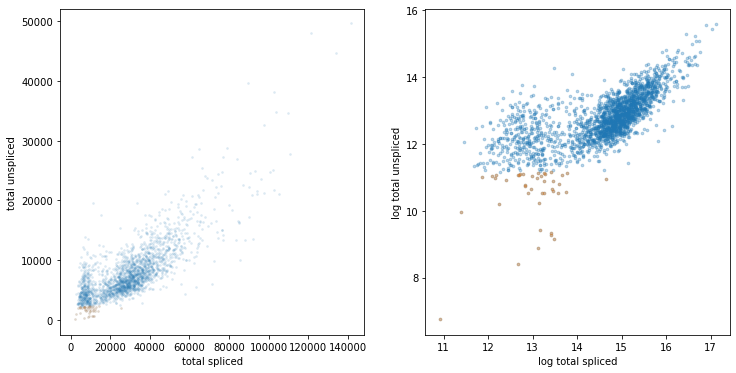

In [258]:
Vcy.normalize_by_total(min_perc_U = 2, plot = True)

In [259]:
Vcy.adjust_totS_totU(skip_low_U_pop = False, fit_with_low_U = False)

## Perform PCA

In [264]:
Vcy.perform_PCA(which = 'S_norm', n_components = 15)

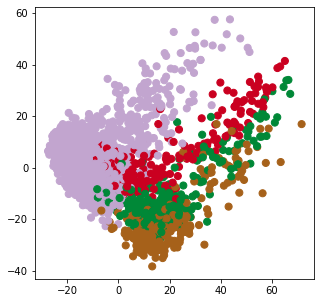

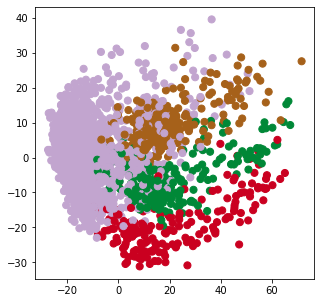

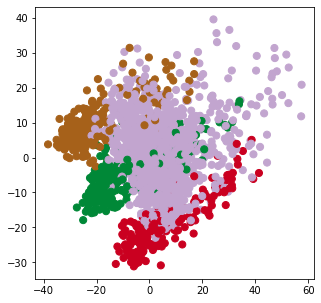

In [265]:
velocyto_plot_pca_2d(Vcy, comps = [0,1])
velocyto_plot_pca_2d(Vcy, comps = [0,2])
velocyto_plot_pca_2d(Vcy, comps = [1,2])

## Perform knn imputation

In [275]:
Vcy.pcs = Vcy.pcs.astype('float64')

In [276]:
Vcy.knn_imputation(k = 100, pca_space = True, metric = 'euclidean', size_norm = True, balanced = True)

## Fit gammas

In [277]:
Vcy.fit_gammas(steady_state_bool = None, 
                   use_imputed_data = True, 
                   use_size_norm = False, 
                   fit_offset = True, 
                   fixperc_q = False, 
                   weighted = True, 
                   weights = 'maxmin_diag', 
                   limit_gamma = False)

## Filter genes based on R2 and gamma

In [280]:
Vcy.filter_genes_by_phase_portrait(minR2 = 0.2, min_gamma = 0.01)

In [281]:
len(Vcy.ra['Gene'])

3516

## Predict U, calculate velocity and extrapolate

In [282]:
Vcy.predict_U(which_S='Sx')
Vcy.calculate_velocity()
Vcy.calculate_shift(assumption="constant_velocity")
Vcy.extrapolate_cell_at_t(delta_t=1)

### Set UMAP

In [283]:
umap = pd.DataFrame(Xs.obsm['X_umap'], index = Xs.obs_names, columns = [0,1])

In [284]:
Vcy.ts = np.array(umap.loc[Vcy.ca['CellID']])

## Calculate transition probability and embedding shift

In [285]:
Vcy.estimate_transition_prob(hidim="Sx", embed="ts", transform = "log", knn_random = False, n_sight = 500)
Vcy.calculate_embedding_shift(sigma_corr = 0.1, expression_scaling=True)

In [288]:
height = 30
width = 30 * 2

fig = plt.figure(facecolor = 'w', figsize = (width, height))

Vcy.calculate_grid_arrows(smooth=1.0, steps=(50, 50), n_neighbors=100)
Vcy.plot_grid_arrows(scatter_kwargs_dict={"alpha":1, "lw":0.0, "edgecolor":"0", "s":500, "rasterized":True}, 
                     min_mass=1, angles='xy', scale_units='xy', plot_random = True,
                     headaxislength=3, headlength=3, headwidth=3, quiver_scale=4)

## Checkpoint

In [291]:
Vcy.cluster_labels = [c.encode('utf8') for c in Vcy.cluster_labels]
Vcy.colorandum = [c.encode('utf8') for c in Vcy.colorandum]

In [292]:
Vcy.to_hdf5(path_output + exp_id + '_Vcy_ANA_IL.hdf5')

In [293]:
Vcy = vcy.load_velocyto_hdf5(path_output + exp_id + '_Vcy_ANA_IL.hdf5')

## Markov model

In [294]:
# Sample uniformly the points to avoid density driven effects - Should reimplement as a method
steps = 50, 50
grs = []
for dim_i in range(Vcy.embedding.shape[1]):
    m, M = np.min(Vcy.embedding[:, dim_i]), np.max(Vcy.embedding[:, dim_i])
    m = m - 0.025 * np.abs(M - m)
    M = M + 0.025 * np.abs(M - m)
    gr = np.linspace(m, M, steps[dim_i])
    grs.append(gr)

meshes_tuple = np.meshgrid(*grs)
gridpoints_coordinates = np.vstack([i.flat for i in meshes_tuple]).T

from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors()
nn.fit(Vcy.embedding)
dist, ixs = nn.kneighbors(gridpoints_coordinates, 1)

diag_step_dist = np.sqrt((meshes_tuple[0][0,0] - meshes_tuple[0][0,1])**2 + (meshes_tuple[1][0,0] - meshes_tuple[1][1,0])**2)
min_dist = diag_step_dist / 2
ixs = ixs[dist < min_dist]
gridpoints_coordinates = gridpoints_coordinates[dist.flat[:]<min_dist,:]
dist = dist[dist < min_dist]

ixs = np.unique(ixs)

## Forward diffusion

In [303]:
Vcy.prepare_markov(sigma_D=diag_step_dist, sigma_W=diag_step_dist/2, direction='forward', cells_ixs=ixs)

In [304]:
Vcy.run_markov(starting_p=np.ones(len(ixs)), n_steps=2500)

In [305]:
Vcy.ca['diffused_fwd'] = Vcy.diffused

In [306]:
diffused_fwd = pd.Series(Vcy.diffused, index = Vcy.ca['CellID'][ixs])

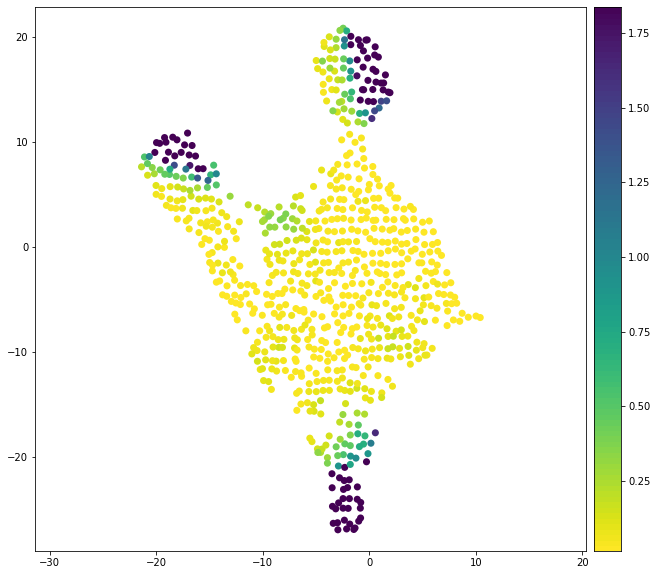

In [307]:
expr = diffused_fwd*1000 
draw_scatter_expr(Xs[expr.index].obsm['X_umap'],
                  expr,
                  vmin=np.percentile(expr, 10),
                  vmax=np.percentile(expr, 90),
                  cmap=plt.cm.viridis_r)

## Backwards diffusion diffusion

In [312]:
Vcy.prepare_markov(sigma_D=diag_step_dist, sigma_W=diag_step_dist/2, direction='backwards', cells_ixs=ixs)

In [313]:
Vcy.run_markov(starting_p=np.ones(len(ixs)), n_steps=2500)

In [314]:
Vcy.ca['diffused_bwd'] = Vcy.diffused

In [315]:
diffused_bwd = pd.Series(Vcy.diffused, index = Vcy.ca['CellID'][ixs])

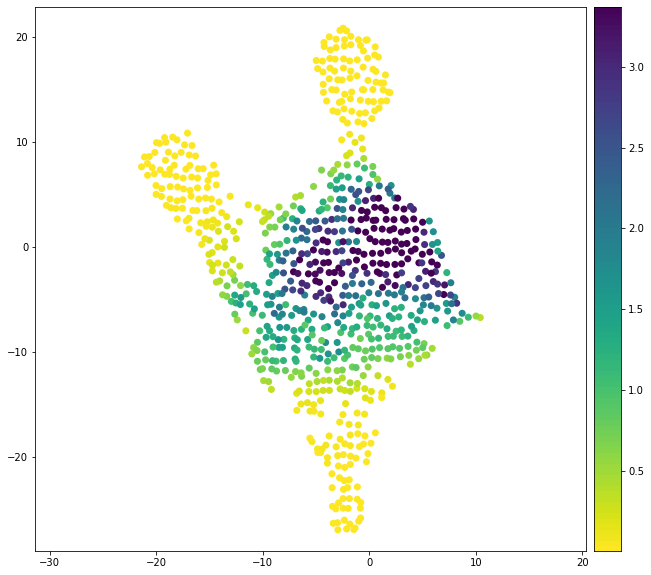

In [316]:
expr = diffused_bwd*1000 
draw_scatter_expr(Xs[expr.index].obsm['X_umap'],
                  expr,
                  vmin=np.percentile(expr, 10),
                  vmax=np.percentile(expr, 90),
                  cmap=plt.cm.viridis_r)

## Checkpoint

In [317]:
#saveData_v1(diffused_fwd, path_output, exp_id, 'diffused_fwd_val')
#saveData_v1(diffused_bwd, path_output, exp_id, 'diffused_bwd_val')

In [318]:
#X.write_h5ad('%s/%s_X_MKnew_2nd_ANA_IL.h5' % (path_output, exp_id))
#Xs.write_h5ad('%s/%s_Xs_MKnew_2nd_ANA_IL.h5' % (path_output, exp_id))

# 2nd level clustering - fibroblasts

In [283]:
X_1st = sc.read_h5ad('%s/%s_X_MKnew_1st.h5' % (path_output, exp_id))

## Select fibroblasts

In [284]:
c_sel_FIB = X_1st.obs['cl_1st'][X_1st.obs['cl_1st']=='FIB'].index

In [285]:
len(c_sel_FIB)

637

In [286]:
X = X_1st[c_sel_FIB]

## Remove cells with incluster size factor < 0.1 (low quality cells)

### NB: Use less stringent cutoffs because there likely is still a lot of biological heterogeneity in the clusters for which size factors were calculated

In [287]:
sf_FIB = X.obs['sf_1st']

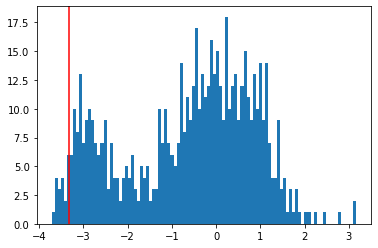

In [293]:
plt.hist(np.log2(sf_FIB[sf_FIB>0]), bins = 100)
plt.axvline(np.log2(0.1), color = 'red')

In [289]:
len(sf_FIB)

637

In [294]:
c_rem = sf_FIB[sf_FIB<0.1].index
c_sel = sf_FIB[sf_FIB>=0.1].index

In [295]:
len(c_rem)

18

In [296]:
len(c_sel)

619

In [297]:
X = X[c_sel]

In [ ]:
cl_1st_tmp = pd.Series(X_1st.obs['cl_1st'], index = X_1st.obs_names).astype(str)
cl_1st_tmp[c_rem_ANA] = 'JUNK'

In [298]:
cl_1st_tmp[c_rem] = 'JUNK'

## Feature selection


Dropping unexpressed genes from dataset

After mean expression cutoff of 0.025, 12131 genes remain

After high variance feature selection, 2500 genes remain


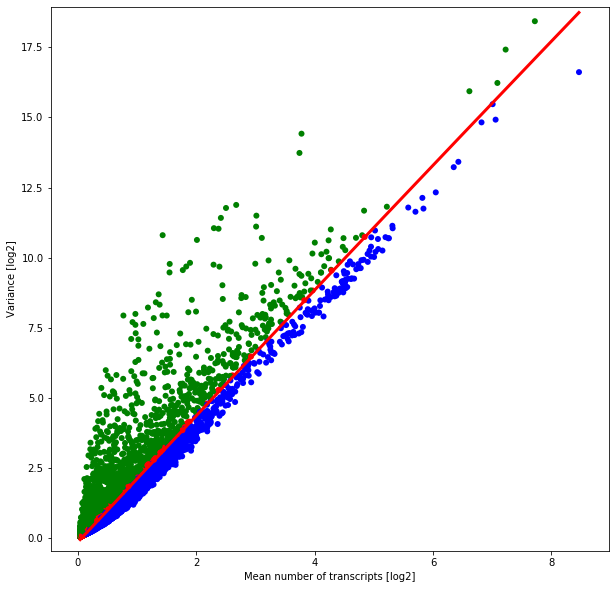

In [299]:
g_sel = select_features_log2_var_polyfit_v2(sc2pd(X, 'raw'), 0.025, 2500).index

In [300]:
Xs = X[:,g_sel]

In [301]:
Xs.X = Xs.layers['norm_log']

## Dimensionality reduction

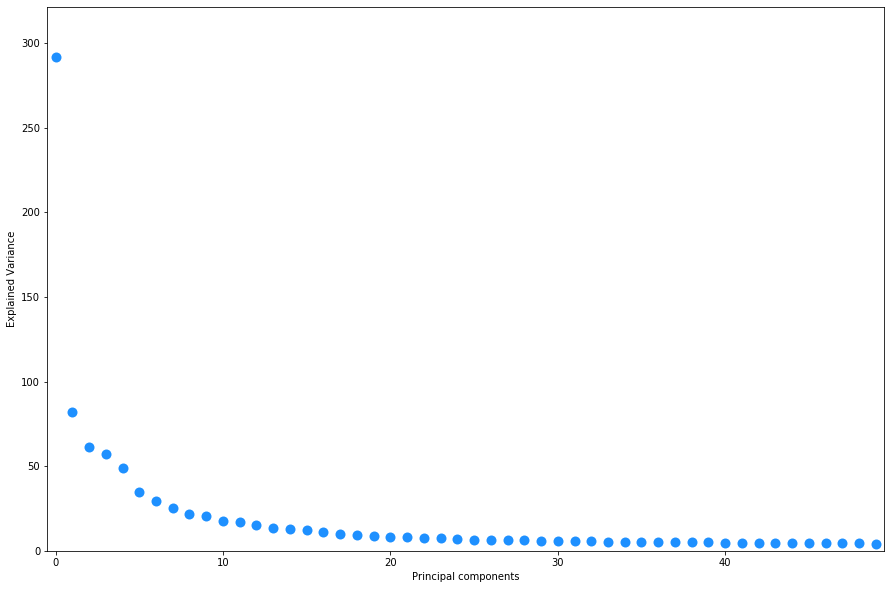

In [304]:
pca_explained_var(sc2pd(Xs,'norm_log'))

In [303]:
sc.pp.pca(Xs, n_comps = 50)

## k nearest neighbors

In [305]:
sc.pp.neighbors(Xs, n_neighbors=50, n_pcs=20, metric='euclidean')

## UMAP

In [306]:
sc.tl.umap(Xs, min_dist=1, spread=3)

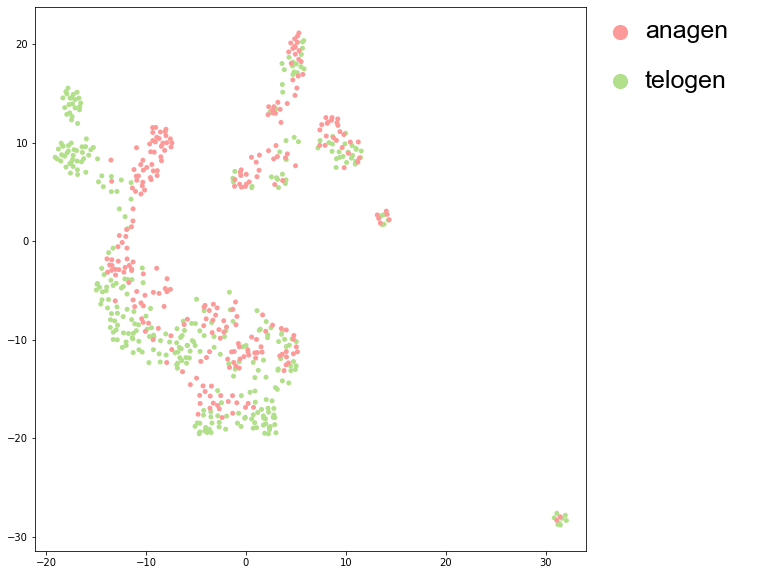

In [307]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['stage'], 
                    {'telogen':'#b2df8a', 'anagen':'#fb9a99'}, s=25)

## Leiden clustering

In [330]:
sc.tl.leiden(Xs, resolution = 0.7)

In [331]:
len(set(Xs.obs['leiden']))

11

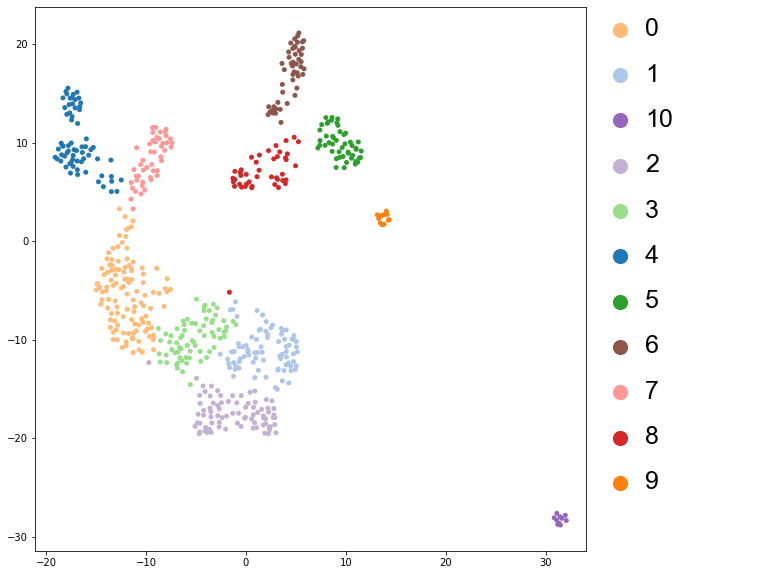

In [332]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['leiden'], 
                    s=25)

## Many populations in this subset are not fibroblast-related but belong to the vasculature or the neural-crest derived compartment. Move and recluster.

In [366]:
# 6 and 8 are vascular cells

c_sel_VASC = Xs.obs['leiden'][Xs.obs['leiden'].isin(['6','8'])].index

# 5 are melanocytes

c_sel_NC = Xs.obs['leiden'][Xs.obs['leiden'].isin(['5'])].index

# 10 are skeletal muscle cells

c_sel_MISC = Xs.obs['leiden'][Xs.obs['leiden'].isin(['10'])].index

# 9 seems to contain random keratinocytes (move to JUNK)

c_sel_JUNK = Xs.obs['leiden'][Xs.obs['leiden'].isin(['9'])].index

In [367]:
len(c_sel_VASC)

91

In [368]:
len(c_sel_NC)

48

In [369]:
len(c_sel_MISC)

10

In [370]:
len(c_sel_JUNK)

11

In [371]:
cl_1st_tmp[c_sel_VASC] = 'VASC'
cl_1st_tmp[c_sel_NC] = 'NC'
cl_1st_tmp[c_sel_MISC] = 'MISC'
cl_1st_tmp[c_sel_JUNK] = 'JUNK'

In [372]:
Counter(cl_1st_tmp)

Counter({'EPI': 3838,
         'FIB': 459,
         'JUNK': 1044,
         'IMM': 730,
         'MEL': 48,
         'VASC': 91,
         'MISC': 105,
         'ANA': 2366})

In [373]:
c_sel = cl_1st_tmp[cl_1st_tmp=='FIB'].index

In [374]:
X = X[c_sel]

## Feature selection II

In [375]:
g_sel = select_features_log2_var_polyfit_v2(sc2pd(X, 'raw'), 0.025, 2500).index


Dropping unexpressed genes from dataset

After mean expression cutoff of 0.025, 11754 genes remain

After high variance feature selection, 2500 genes remain


In [376]:
Xs = X[:,g_sel]

In [377]:
Xs.X = Xs.layers['norm_log']

## Dimensionality reduction II

In [378]:
pca_explained_var(sc2pd(Xs,'norm_log'))

In [379]:
sc.pp.pca(Xs, n_comps = 50)

## k nearest neighbors II

In [380]:
sc.pp.neighbors(Xs, n_neighbors=50, n_pcs=15, metric='euclidean')

## UMAP II

In [381]:
sc.tl.umap(Xs, min_dist=1, spread=3)

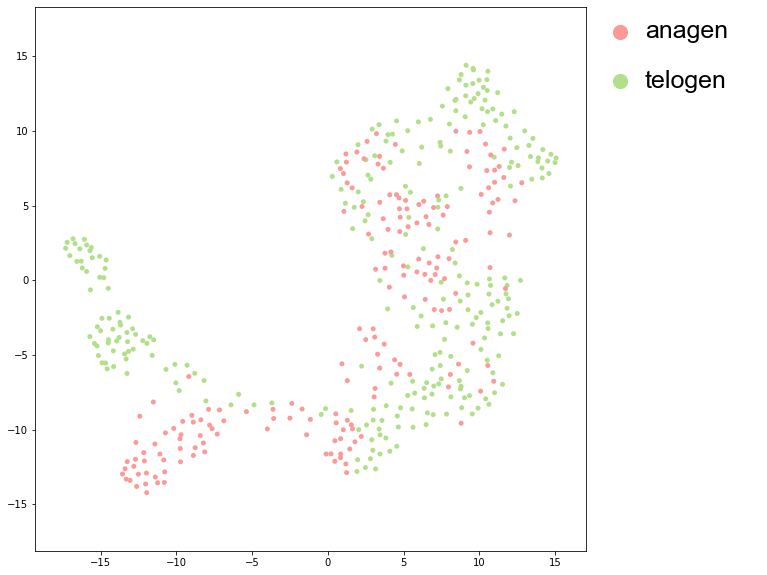

In [382]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['stage'], 
                    {'telogen':'#b2df8a', 'anagen':'#fb9a99'}, s=25)

## Leiden clustering II

In [473]:
sc.tl.leiden(Xs, resolution = 1.0)

In [474]:
len(set(Xs.obs['leiden']))

8

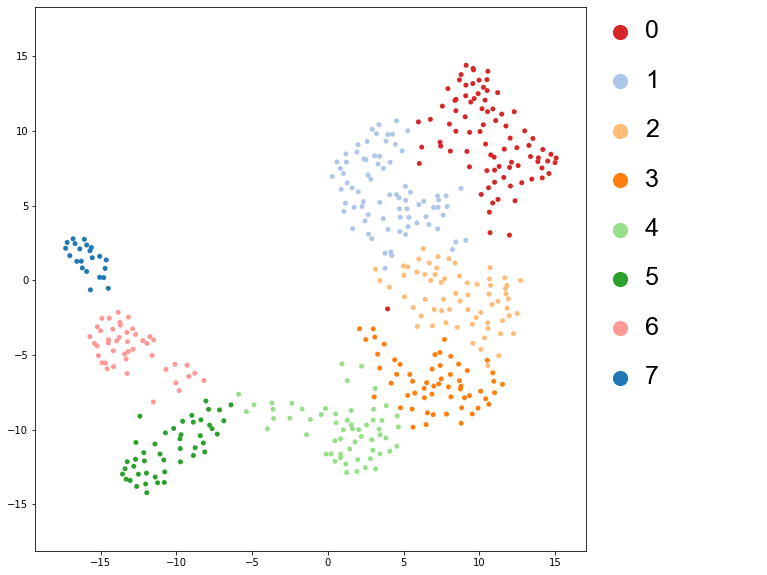

In [475]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['leiden'], 
                    s=25)

## Assign clusters according to identity (based on typical markers from the main dataset)

In [483]:
cl_2nd_FIB = pd.Series(None, index = Xs.obs['leiden'].index)

# telogen DP cells are divided into two subclusters

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['6','7'])].index
cl_2nd_FIB[c_sel] = 'FIB - tDP'

# anagen DP cells and DS cells are found in one cluster

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['5'])].index
cl_2nd_FIB[c_sel] = 'FIB - aDP/DS'

# SF1 (Sparc(hi))

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['4'])].index
cl_2nd_FIB[c_sel] = 'FIB - SF1'


# SF2 (Sparc(lo) / Dcn(hi))

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['3'])].index
cl_2nd_FIB[c_sel] = 'FIB - SF2'

# SF3 (Gpx3+)

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['2'])].index
cl_2nd_FIB[c_sel] = 'FIB - SF3'

# SF4 (Gpx3+/Plac8) is divided into two clusters based on mainly ribosomal expression (or normalisation?)

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['0','1'])].index
cl_2nd_FIB[c_sel] = 'FIB - SF4'

In [484]:
Counter(cl_2nd_FIB)

Counter({'FIB - tDP': 67,
         'FIB - SF4': 164,
         'FIB - SF2': 58,
         'FIB - SF3': 66,
         'FIB - aDP/DS': 46,
         'FIB - SF1': 58})

In [485]:
X.obs['cl_2nd_FIB'] = cl_2nd_FIB
Xs.obs['cl_2nd_FIB'] = cl_2nd_FIB

In [31]:
cmap_FIB = {'FIB - SF1':'#d7191c',
            'FIB - SF2':'#fdae61',
            'FIB - SF3':'#abdda4',
            'FIB - SF4':'#2b83ba',
            'FIB - aDP/DS':'#e7298a',
            'FIB - tDP':'#7570b3'}

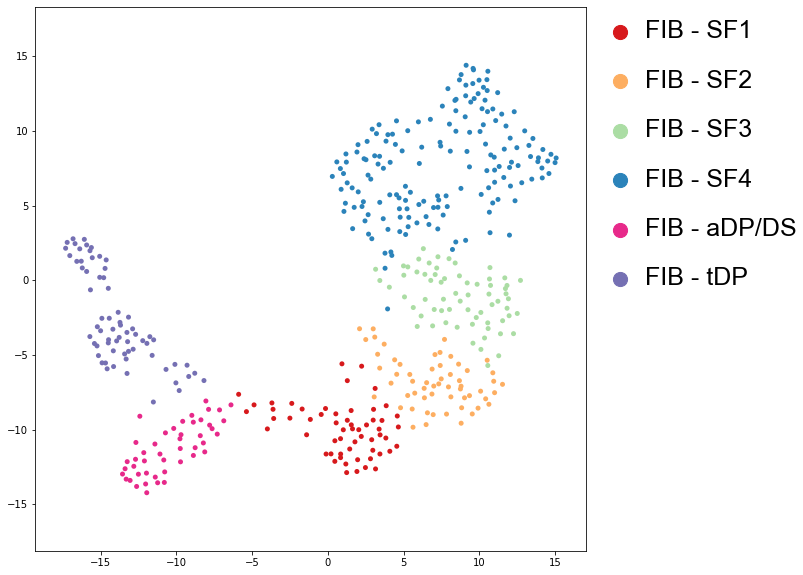

In [501]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['cl_2nd_FIB'],
                    cmap_FIB,
                    s=25)

## Checkpoint

In [502]:
#X.write_h5ad('%s/%s_X_MKnew_2nd_FIB.h5' % (path_output, exp_id))
#Xs.write_h5ad('%s/%s_Xs_MKnew_2nd_FIB.h5' % (path_output, exp_id))

... storing 'cl_2nd_FIB' as categorical
... storing 'cl_2nd_FIB' as categorical


## Update X_1st

In [503]:
X_1st.obs['cl_1st'] = cl_1st_tmp

In [504]:
#X_1st.write_h5ad('%s/%s_X_MKnew_1st.h5' % (path_output, exp_id))

... storing 'cl_1st' as categorical


## Regress out immediate early genes (we discovered that one of the tDP clusters is an artefact explained by IEGs)

In [19]:
X = sc.read_h5ad('%s/%s_X_MKnew_2nd_FIB.h5' % (path_output, exp_id))
Xs = sc.read_h5ad('%s/%s_Xs_MKnew_2nd_FIB.h5' % (path_output, exp_id))

In [20]:
genes_IE = ['Nfkbia','Fos','Junb','Egfr1','Atf3']

In [21]:
sc.tl.score_genes(Xs, genes_IE, score_name='IEG_score')

In [22]:
sc.pp.regress_out(Xs, keys=['IEG_score'])

## Dimensionality reduction III

In [23]:
pca_explained_var(sc2pd(Xs,'norm_log'))

In [24]:
sc.pp.pca(Xs, n_comps = 50)

In [118]:
Xspd = sc2pd(Xs, 'norm_log')

In [119]:
Xspd_pca, dist_c_Xspd = dim_reduc_pca(Xspd, 15, 'euclidean', inverse_transform = False)

In [120]:
aff_c_Xspd = -dist_c_Xspd

## k nearest neighbors III

In [86]:
sc.pp.neighbors(Xs, n_neighbors=50, n_pcs=15, metric='euclidean')

## UMAP III

In [87]:
sc.tl.umap(Xs, min_dist=1, spread=2)

In [88]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['stage'], 
                    {'telogen':'#b2df8a', 'anagen':'#fb9a99'}, s=25)

## Leiden clustering III

In [103]:
sc.tl.leiden(Xs, resolution = 1.5)

In [104]:
len(set(Xs.obs['leiden']))

8

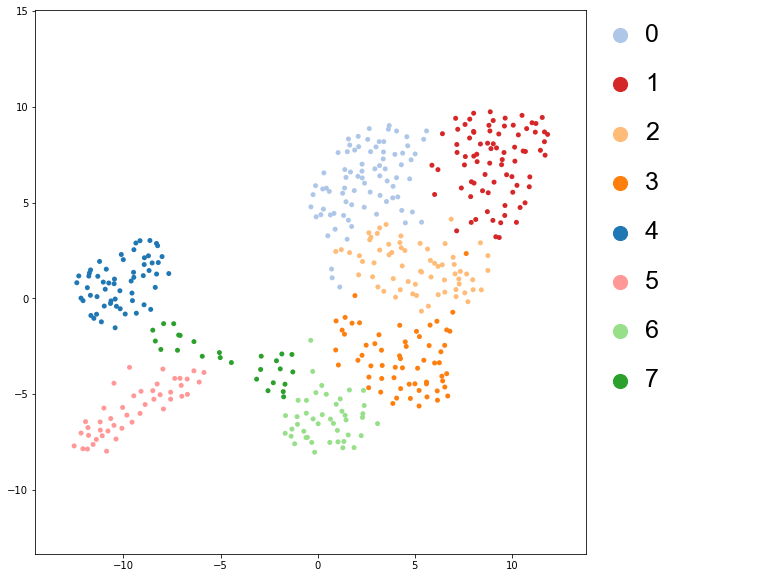

In [105]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['leiden'], 
                    s=25)

## Clustering with AP

In [137]:
cl_c_FIB_AP =  AP_clustering_v4P(aff_c_Xspd, 0, -300, 0.75)

In [138]:
len(set(cl_c_FIB_AP))

7

In [139]:
Xs.obs['cl_2nd_FIB_AP'] = cl_c_FIB_AP[Xs.obs_names]

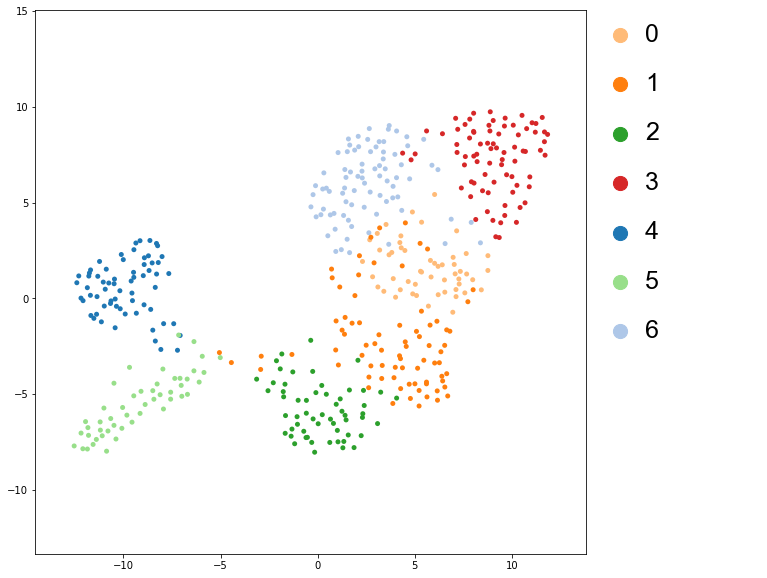

In [140]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['cl_2nd_FIB_AP'], 
                    s=25)

## Assign clusters according to identity (based on typical markers from the main dataset)

In [107]:
cl_2nd_FIB = pd.Series(None, index = Xs.obs['leiden'].index)

# telogen DP cells 

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['4'])].index
cl_2nd_FIB[c_sel] = 'FIB - tDP'

# anagen DP cells and DS cells are found in one cluster

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['5'])].index
cl_2nd_FIB[c_sel] = 'FIB - aDP/DS2'

# DS! cells

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['7'])].index
cl_2nd_FIB[c_sel] = 'FIB - DS1'

# SF1 (Sparc(hi))

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['6'])].index
cl_2nd_FIB[c_sel] = 'FIB - SF1'

# SF2 (Sparc(lo) / Dcn(hi))

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['3'])].index
cl_2nd_FIB[c_sel] = 'FIB - SF2'

# SF3 (Gpx3+)

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['2'])].index
cl_2nd_FIB[c_sel] = 'FIB - SF3'

# SF4 (Gpx3+/Plac8) is divided into two clusters based on mainly ribosomal expression (or normalisation?)

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['0','1'])].index
cl_2nd_FIB[c_sel] = 'FIB - SF4'

In [108]:
Counter(cl_2nd_FIB)

Counter({'FIB - tDP': 58,
         'FIB - SF4': 159,
         'FIB - SF2': 62,
         'FIB - SF3': 65,
         'FIB - DS1': 26,
         'FIB - SF1': 44,
         'FIB - aDP/DS2': 45})

In [109]:
X.obs['cl_2nd_FIB_v2'] = cl_2nd_FIB
Xs.obs['cl_2nd_FIB_v2'] = cl_2nd_FIB

In [114]:
cmap_FIB = {'FIB - SF1':'#d7191c',
            'FIB - SF2':'#fdae61',
            'FIB - SF3':'#abdda4',
            'FIB - SF4':'#2b83ba',
            'FIB - DS1':'#e78ac3',
            'FIB - aDP/DS2':'#e7298a',
            'FIB - tDP':'#7570b3'}

In [115]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['cl_2nd_FIB_v2'],
                    cmap_FIB,
                    s=25)

## Checkpoint

In [116]:
#X.write_h5ad('%s/%s_X_MKnew_2nd_FIB_regr.h5' % (path_output, exp_id))
#Xs.write_h5ad('%s/%s_Xs_MKnew_2nd_FIB_regr.h5' % (path_output, exp_id))

... storing 'cl_2nd_FIB_v2' as categorical
... storing 'cl_2nd_FIB_v2' as categorical


# 2nd level clustering - immune cells

In [12]:
X_1st = sc.read_h5ad('%s/%s_X_MKnew_1st.h5' % (path_output, exp_id))

## Select immune cells

In [13]:
c_sel_IMM = X_1st.obs['cl_1st'][X_1st.obs['cl_1st']=='IMM'].index

In [14]:
len(c_sel_IMM)

730

In [15]:
X = X_1st[c_sel_IMM]

## Remove cells with incluster size factor < 0.25 (low quality cells)

In [16]:
sf_IMM = X.obs['sf_1st']

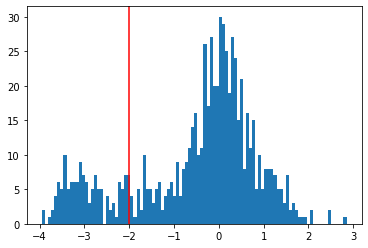

In [18]:
plt.hist(np.log2(sf_IMM[sf_IMM>0]), bins = 100)
plt.axvline(np.log2(0.25), color = 'red')

In [19]:
len(sf_IMM)

730

In [20]:
c_rem = sf_IMM[sf_IMM<0.1].index
c_sel = sf_IMM[sf_IMM>=0.1].index

In [21]:
len(c_rem)

36

In [22]:
len(c_sel)

694

In [23]:
X = X[c_sel]

In [26]:
cl_1st_tmp = pd.Series(X_1st.obs['cl_1st'], index = X_1st.obs_names).astype(str)

In [27]:
cl_1st_tmp[c_rem] = 'JUNK'

## Feature selection


Dropping unexpressed genes from dataset

After mean expression cutoff of 0.025, 11293 genes remain

After high variance feature selection, 2500 genes remain


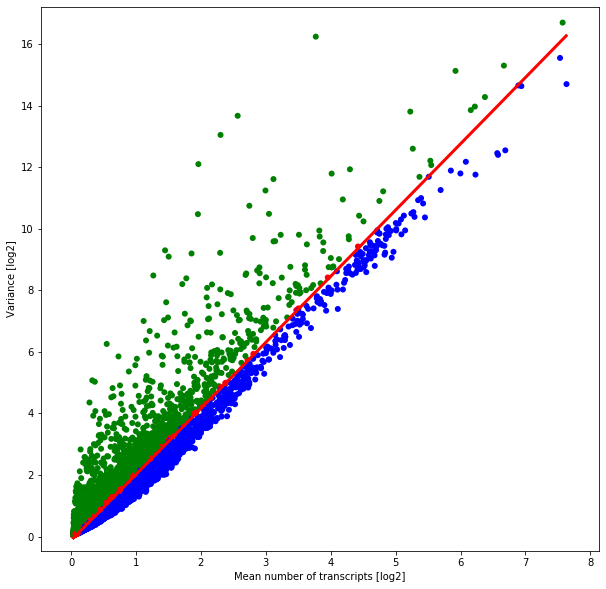

In [29]:
g_sel = select_features_log2_var_polyfit_v2(sc2pd(X, 'raw'), 0.025, 2500).index

In [30]:
Xs = X[:,g_sel]

In [31]:
Xs.X = Xs.layers['norm_log']

## Dimensionality reduction

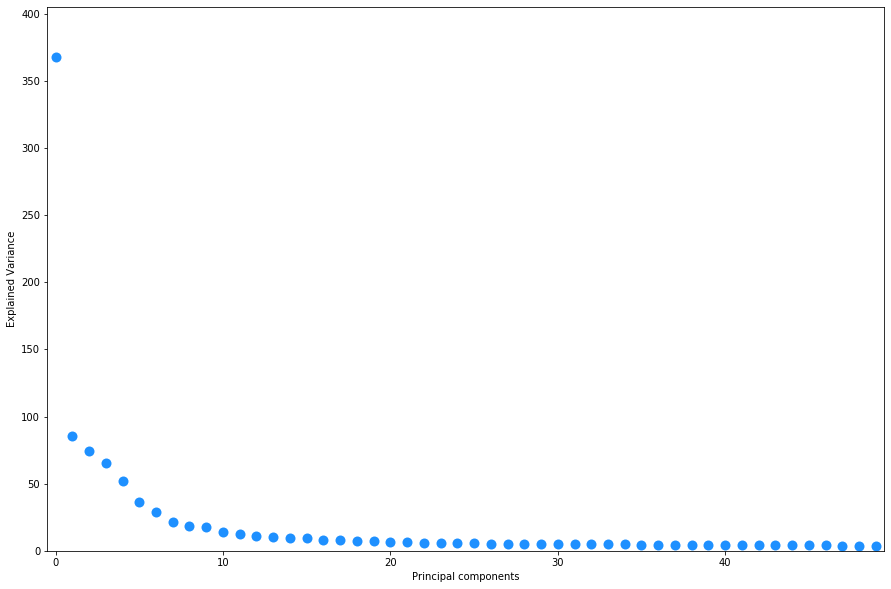

In [32]:
pca_explained_var(sc2pd(Xs,'norm_log'))

In [33]:
sc.pp.pca(Xs, n_comps = 50)

## k nearest neighbors

In [34]:
sc.pp.neighbors(Xs, n_neighbors=50, n_pcs=10, metric='euclidean')

## UMAP

In [35]:
sc.tl.umap(Xs, min_dist=1, spread=3)

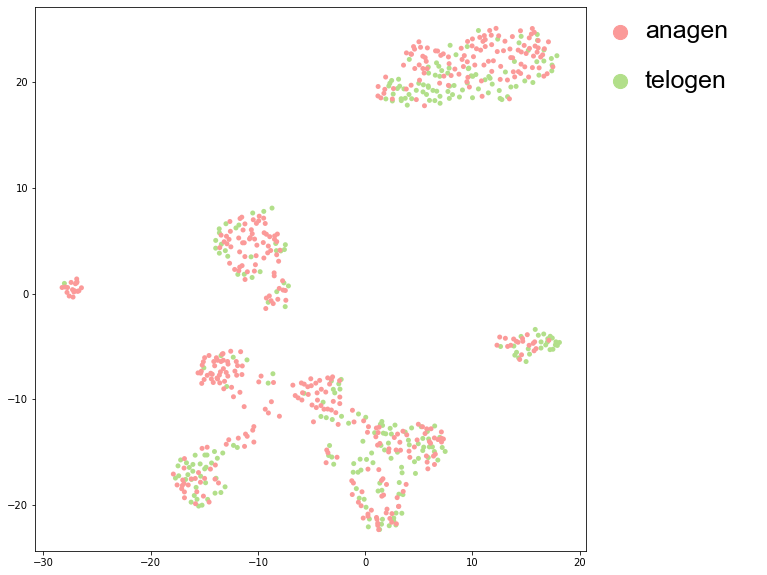

In [36]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['stage'], 
                    {'telogen':'#b2df8a', 'anagen':'#fb9a99'}, s=25)

## Leiden clustering

In [81]:
sc.tl.leiden(Xs, resolution = 0.6)

In [82]:
len(set(Xs.obs['leiden']))

8

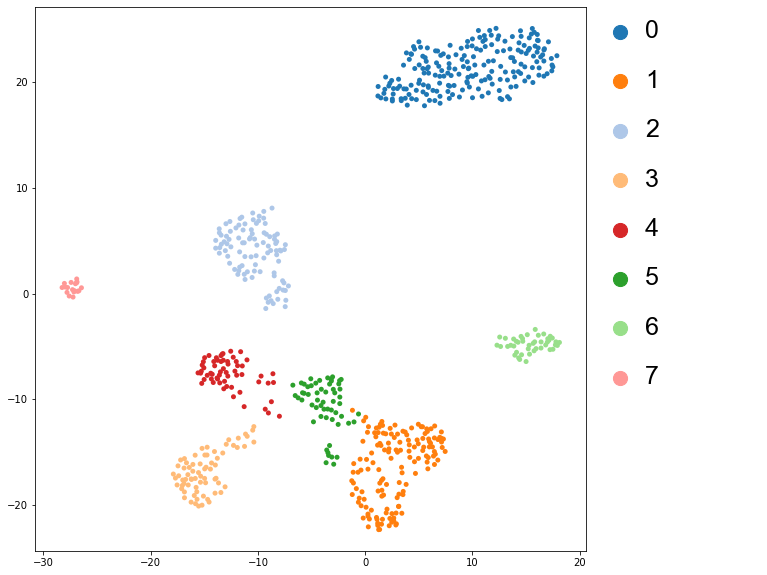

In [83]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['leiden'], 
                    s=25)

## Assign clusters according to identity (based on typical markers from the main dataset)

In [90]:
cl_2nd_IMM = pd.Series(None, index = Xs.obs['leiden'].index)

# T-cells were divided into two clear clusters here

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['0'])].index
cl_2nd_IMM[c_sel] = 'IMM - TC1'

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['2'])].index
cl_2nd_IMM[c_sel] = 'IMM - TC2'

# Macrophages

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['3'])].index
cl_2nd_IMM[c_sel] = 'IMM - MC1'

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['1'])].index
cl_2nd_IMM[c_sel] = 'IMM - MC2'

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['4'])].index
cl_2nd_IMM[c_sel] = 'IMM - MC3'

# Neutrophils (not present in main dataset)

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['7'])].index
cl_2nd_IMM[c_sel] = 'IMM - GN'

# Dendritic cells

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['5'])].index
cl_2nd_IMM[c_sel] = 'IMM - DC'

# Langerhans cells

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['6'])].index
cl_2nd_IMM[c_sel] = 'IMM - LH'

In [91]:
Counter(cl_2nd_IMM)

Counter({'IMM - TC1': 202,
         'IMM - TC2': 97,
         'IMM - MC2': 145,
         'IMM - MC1': 71,
         'IMM - DC': 57,
         'IMM - LH': 44,
         'IMM - MC3': 60,
         'IMM - GN': 18})

In [92]:
X.obs['cl_2nd_IMM'] = cl_2nd_IMM
Xs.obs['cl_2nd_IMM'] = cl_2nd_IMM

In [95]:
cmap_IMM = {'IMM - TC1':'#a6cee3',
            'IMM - TC2':'#1f78b4',
            'IMM - MC1':'#d95f02',
            'IMM - MC2':'#33a02c',
            'IMM - MC3':'#b2df8a',
            'IMM - GN':'#666666',
            'IMM - DC':'#6a3d9a',
            'IMM - LH':'#e7298a',}

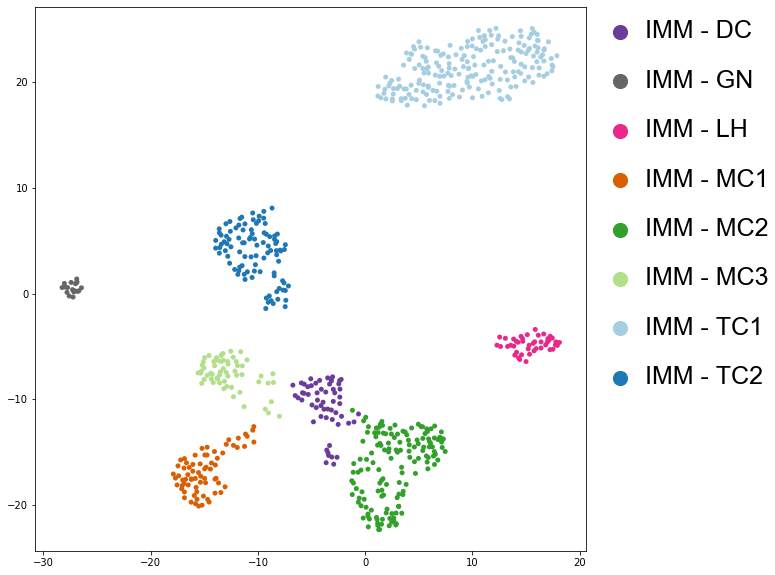

In [96]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['cl_2nd_IMM'],
                    cmap_IMM,
                    s=25)

## Checkpoint

In [97]:
#X.write_h5ad('%s/%s_X_MKnew_2nd_IMM.h5' % (path_output, exp_id))
#Xs.write_h5ad('%s/%s_Xs_MKnew_2nd_IMM.h5' % (path_output, exp_id))

... storing 'cl_2nd_IMM' as categorical
... storing 'cl_2nd_IMM' as categorical


## Update X_1st

In [98]:
X_1st.obs['cl_1st'] = cl_1st_tmp

In [99]:
#X_1st.write_h5ad('%s/%s_X_MKnew_1st.h5' % (path_output, exp_id))

... storing 'cl_1st' as categorical


# 2nd level clustering - vascular cells

In [100]:
X_1st = sc.read_h5ad('%s/%s_X_MKnew_1st.h5' % (path_output, exp_id))

## Select vascular cells

In [101]:
c_sel_VASC = X_1st.obs['cl_1st'][X_1st.obs['cl_1st']=='VASC'].index

In [102]:
len(c_sel_VASC)

91

In [103]:
X = X_1st[c_sel_VASC]

## Remove cells with incluster size factor < 0.1 (low quality cells)

### NB: Use less stringent cutoffs because there likely is still a lot of biological heterogeneity in the clusters for which size factors were calculated

In [104]:
sf_VASC = X.obs['sf_1st']

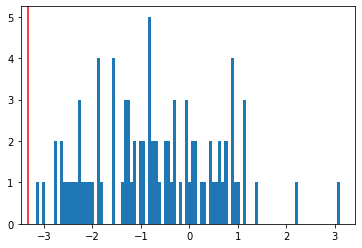

In [105]:
plt.hist(np.log2(sf_VASC[sf_VASC>0]), bins = 100)
plt.axvline(np.log2(0.1), color = 'red')

In [106]:
len(sf_VASC)

91

In [107]:
c_rem = sf_VASC[sf_VASC<0.1].index
c_sel = sf_VASC[sf_VASC>=0.1].index

In [108]:
len(c_rem)

0

In [109]:
len(c_sel)

91

In [110]:
X = X[c_sel]

In [111]:
cl_1st_tmp = pd.Series(X_1st.obs['cl_1st'], index = X_1st.obs_names).astype(str)
cl_1st_tmp[c_rem] = 'JUNK'

## Feature selection


Dropping unexpressed genes from dataset

After mean expression cutoff of 0.025, 11202 genes remain

After high variance feature selection, 1000 genes remain


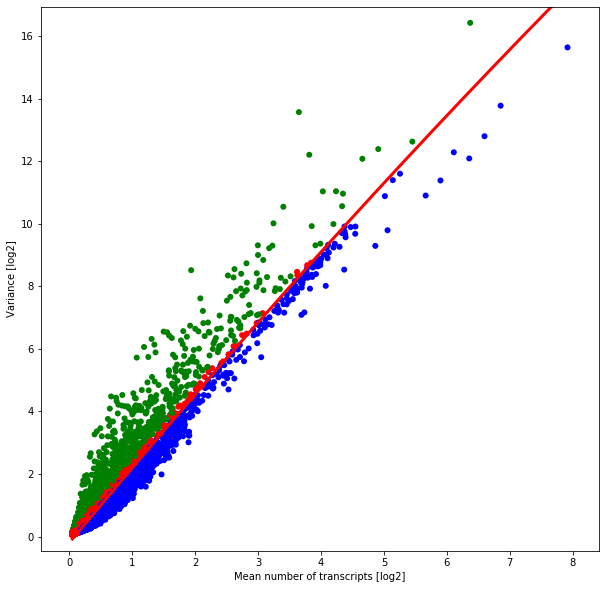

In [145]:
g_sel = select_features_log2_var_polyfit_v2(sc2pd(X, 'raw'), 0.025, 1000).index

In [146]:
Xs = X[:,g_sel]

In [147]:
Xs.X = Xs.layers['norm_log']

## Dimensionality reduction

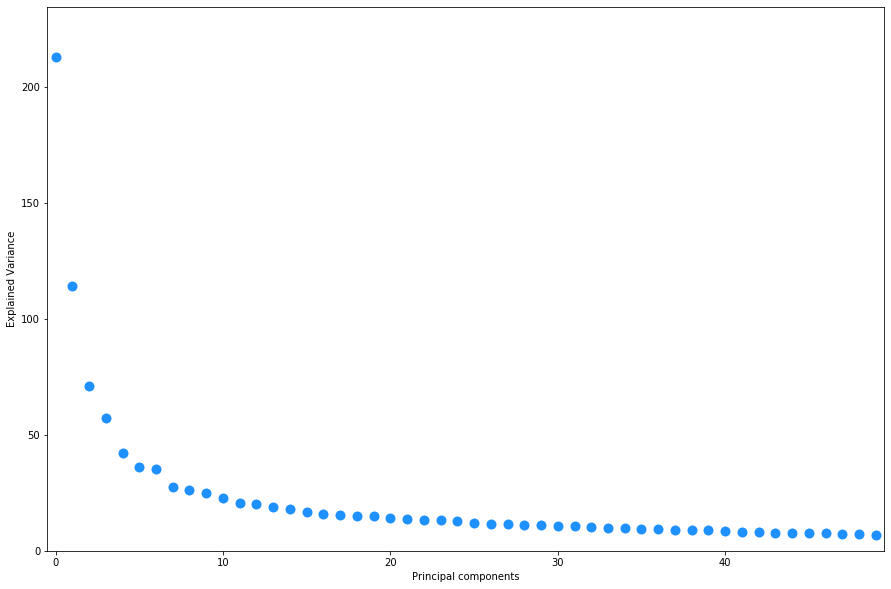

In [148]:
pca_explained_var(sc2pd(Xs,'norm_log'))

In [149]:
sc.pp.pca(Xs, n_comps = 50)

## k nearest neighbors

In [150]:
sc.pp.neighbors(Xs, n_neighbors=50, n_pcs=10, metric='euclidean')

## UMAP

In [151]:
sc.tl.umap(Xs, min_dist=0.5, spread=2)

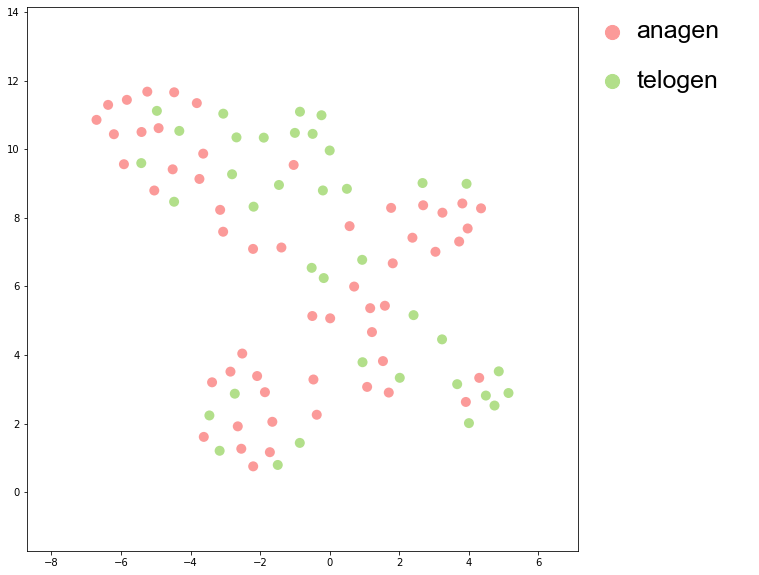

In [152]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['stage'], 
                    {'telogen':'#b2df8a', 'anagen':'#fb9a99'}, s=100)

## Leiden clustering

In [172]:
sc.tl.leiden(Xs, resolution = 0.5)

In [173]:
len(set(Xs.obs['leiden']))

3

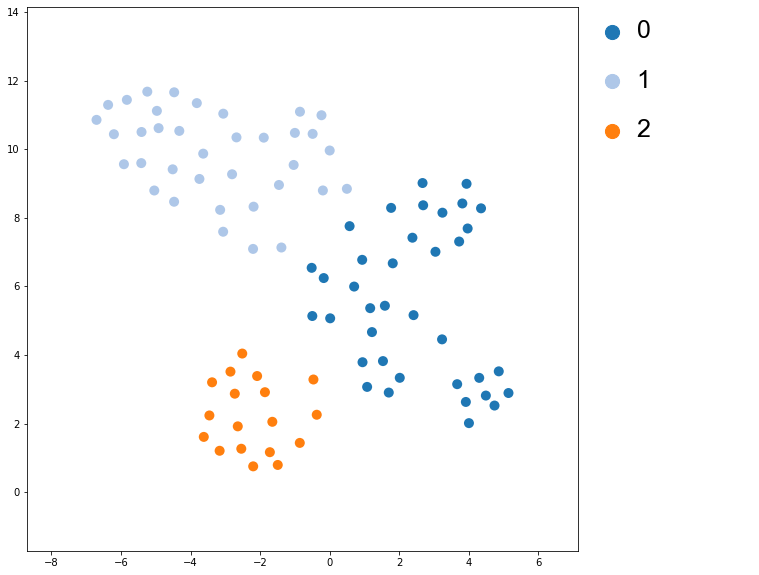

In [174]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['leiden'], 
                    s=100)

## Some Mbp/Mpz/Cnp hi cells are among cluster 0. Move to NC clustering

In [179]:
Xpd = sc2pd(X, 'norm')

In [180]:
c_sel = Xpd.loc['Mpz'][Xpd.loc['Mpz']>5].index

In [181]:
len(c_sel)

5

In [186]:
cl_1st_tmp[c_sel] = 'NC'

In [190]:
Counter(cl_1st_tmp)

Counter({'EPI': 3838,
         'FIB': 459,
         'JUNK': 1080,
         'IMM': 694,
         'NC': 53,
         'VASC': 86,
         'MISC': 105,
         'ANA': 2366})

In [193]:
c_sel_VASC = cl_1st_tmp[cl_1st_tmp=='VASC'].index

In [194]:
len(c_sel_VASC)

86

In [197]:
X = X[c_sel_VASC]
Xs = Xs[c_sel_VASC]

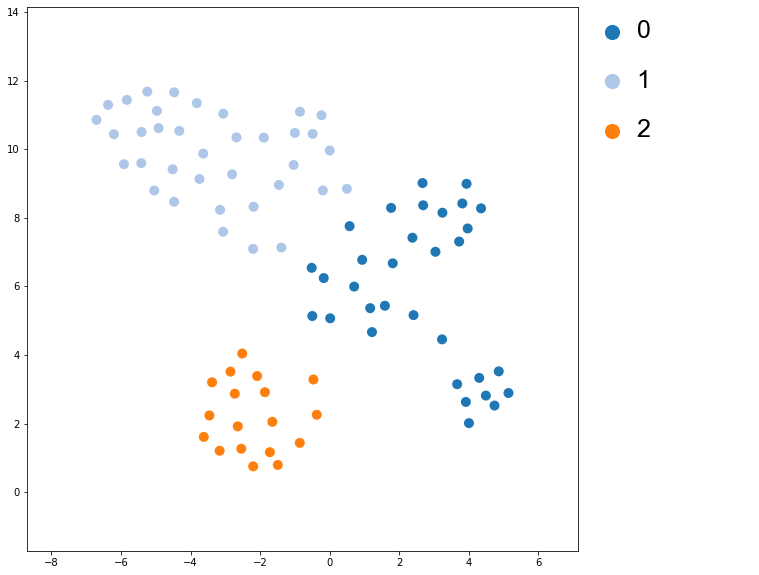

In [198]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['leiden'], 
                    s=100)

## Assign clusters according to identity (based on typical markers from the main dataset)

In [199]:
cl_2nd_VASC = pd.Series(None, index = Xs.obs['leiden'].index)

# Endothelial cells

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['1'])].index
cl_2nd_VASC[c_sel] = 'VASC - EC'

# Lymph vessel cells

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['0'])].index
cl_2nd_VASC[c_sel] = 'VASC - LC'

# vascular smoot muscle cells

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['2'])].index
cl_2nd_VASC[c_sel] = 'VASC - vSM'

In [200]:
Counter(cl_2nd_VASC)

Counter({'VASC - LC': 32, 'VASC - EC': 36, 'VASC - vSM': 18})

In [201]:
X.obs['cl_2nd_VASC'] = cl_2nd_VASC
Xs.obs['cl_2nd_VASC'] = cl_2nd_VASC

In [202]:
cmap_VASC = {'VASC - EC':'#33a02c',
             'VASC - LC':'#e31a1c',
             'VASC - vSM':'#1f78b4',}

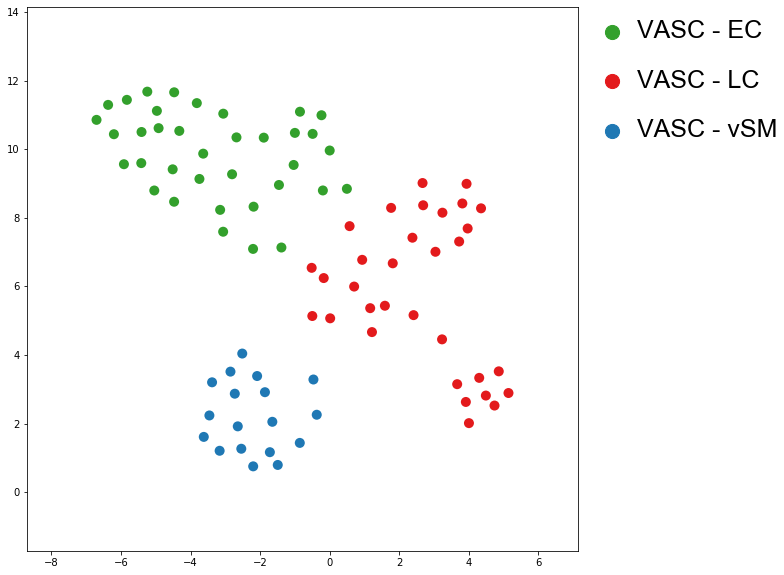

In [203]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['cl_2nd_VASC'],
                    cmap_VASC,
                    s=100)

## Checkpoint

In [204]:
#X.write_h5ad('%s/%s_X_MKnew_2nd_VASC.h5' % (path_output, exp_id))
#Xs.write_h5ad('%s/%s_Xs_MKnew_2nd_VASC.h5' % (path_output, exp_id))

... storing 'cl_2nd_VASC' as categorical
... storing 'cl_2nd_VASC' as categorical


## Update X_1st

In [205]:
X_1st.obs['cl_1st'] = cl_1st_tmp

In [206]:
#X_1st.write_h5ad('%s/%s_X_MKnew_1st.h5' % (path_output, exp_id))

... storing 'cl_1st' as categorical


# 2nd level clustering - neural crest derived cells

In [344]:
X_1st = sc.read_h5ad('%s/%s_X_MKnew_1st.h5' % (path_output, exp_id))

## Select NC cells

In [345]:
c_sel_NC = X_1st.obs['cl_1st'][X_1st.obs['cl_1st']=='NC'].index

In [346]:
len(c_sel_NC)

53

In [347]:
X = X_1st[c_sel_NC]

## Remove cells with incluster size factor < 0.1 (low quality cells)

### NB: Use less stringent cutoffs because there likely is still a lot of biological heterogeneity in the clusters for which size factors were calculated

In [348]:
sf_NC = X.obs['sf_1st']

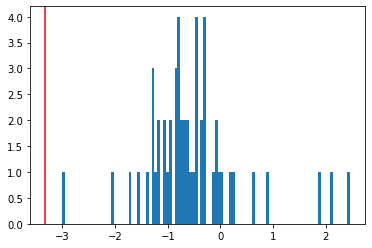

In [349]:
plt.hist(np.log2(sf_NC[sf_NC>0]), bins = 100)
plt.axvline(np.log2(0.1), color = 'red')

In [350]:
len(sf_NC)

53

In [351]:
c_rem = sf_NC[sf_NC<0.1].index
c_sel = sf_NC[sf_NC>=0.1].index

In [352]:
len(c_rem)

0

In [353]:
len(c_sel)

53

In [354]:
X = X[c_sel]

In [355]:
cl_1st_tmp = pd.Series(X_1st.obs['cl_1st'], index = X_1st.obs_names).astype(str)
cl_1st_tmp[c_rem] = 'JUNK'

## Feature selection


Dropping unexpressed genes from dataset

After mean expression cutoff of 0.025, 10050 genes remain

After high variance feature selection, 1000 genes remain


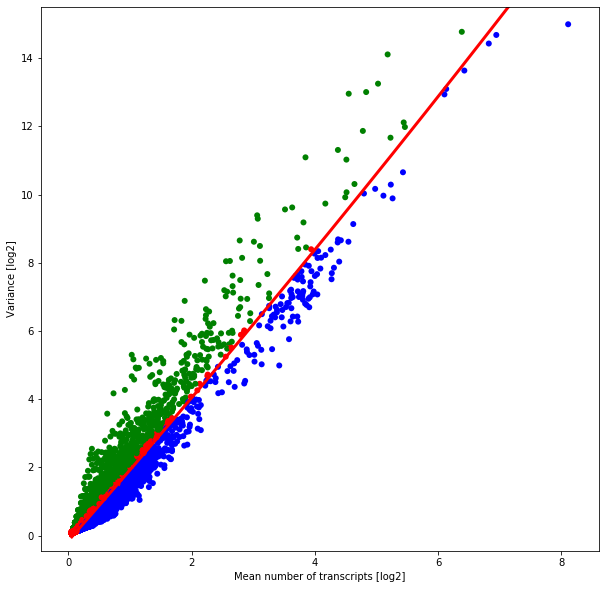

In [356]:
g_sel = select_features_log2_var_polyfit_v2(sc2pd(X, 'raw'), 0.025, 1000).index

In [357]:
Xs = X[:,g_sel]

In [358]:
Xs.X = Xs.layers['norm_log']

## Dimensionality reduction

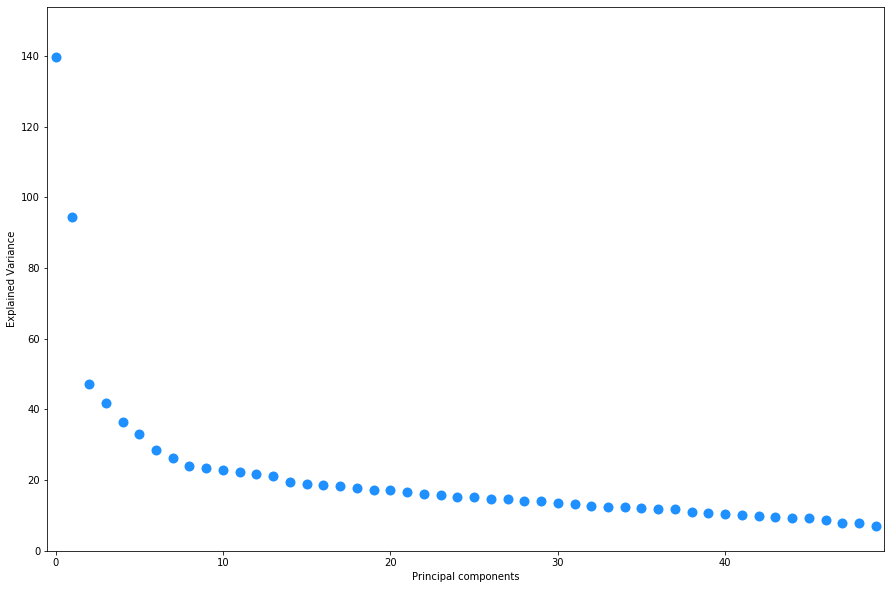

In [359]:
pca_explained_var(sc2pd(Xs,'norm_log'))

In [360]:
sc.pp.pca(Xs, n_comps = 50)

## k nearest neighbors

In [361]:
sc.pp.neighbors(Xs, n_neighbors=10, n_pcs=5, metric='euclidean')

## UMAP

In [362]:
sc.tl.umap(Xs, min_dist=1, spread=2)

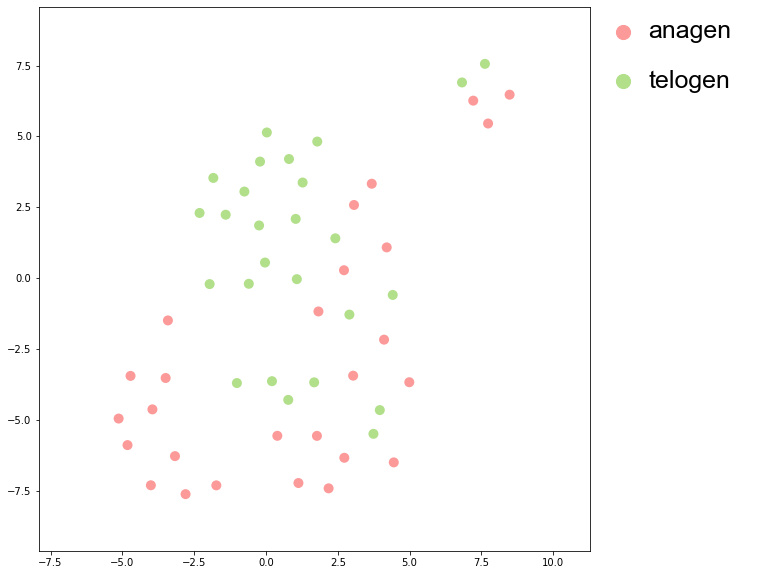

In [364]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['stage'], 
                    {'telogen':'#b2df8a', 'anagen':'#fb9a99'}, s=100)

## Leiden clustering

In [262]:
sc.tl.leiden(Xs, resolution = 0.15)

In [263]:
len(set(Xs.obs['leiden']))

2

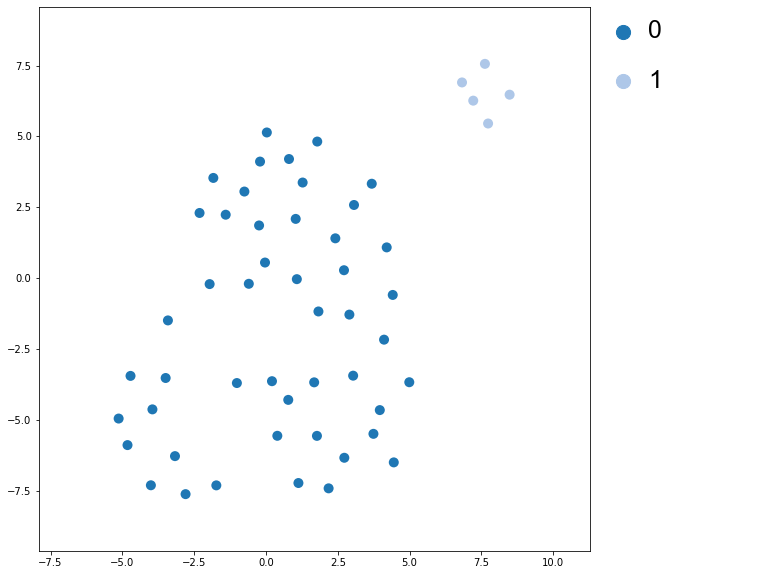

In [264]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['leiden'], 
                    s=100)

## Assign clusters according to identity (based on typical markers from the main dataset)

In [265]:
cl_2nd_NC = pd.Series(None, index = Xs.obs['leiden'].index)

# Melanocytes

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['0'])].index
cl_2nd_NC[c_sel] = 'NC - MEL'

# Schwann cells

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['1'])].index
cl_2nd_NC[c_sel] = 'NC - SC'

In [266]:
Counter(cl_2nd_NC)

Counter({'NC - MEL': 48, 'NC - SC': 5})

In [267]:
X.obs['cl_2nd_NC'] = cl_2nd_NC
Xs.obs['cl_2nd_NC'] = cl_2nd_NC

In [268]:
cmap_NC = {'NC - MEL':'#66a61e',
           'NC - SC':'#e6ab02',}

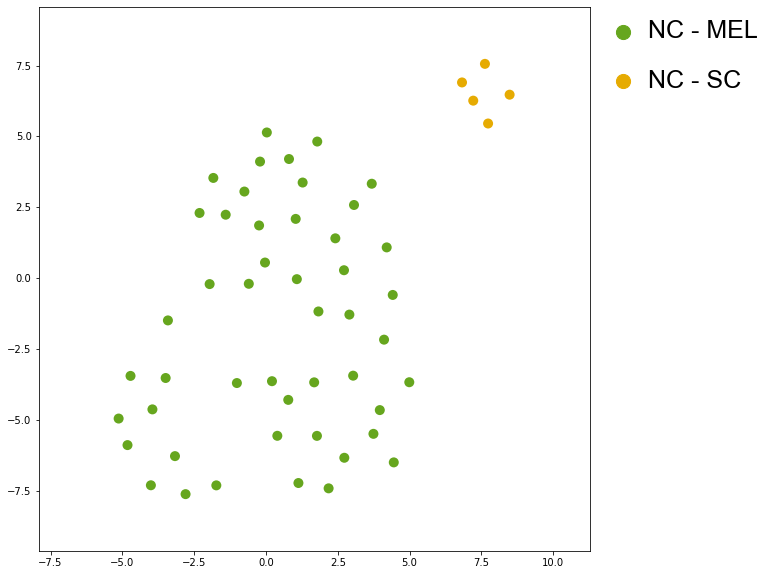

In [269]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['cl_2nd_NC'],
                    cmap_NC,
                    s=100)

## Checkpoint

In [270]:
#X.write_h5ad('%s/%s_X_MKnew_2nd_NC.h5' % (path_output, exp_id))
#Xs.write_h5ad('%s/%s_Xs_MKnew_2nd_NC.h5' % (path_output, exp_id))

... storing 'cl_2nd_NC' as categorical
... storing 'cl_2nd_NC' as categorical


## Update X_1st

In [271]:
X_1st.obs['cl_1st'] = cl_1st_tmp

In [272]:
#X_1st.write_h5ad('%s/%s_X_MKnew_1st.h5' % (path_output, exp_id))

... storing 'cl_1st' as categorical


# 2nd level clustering - miscellaneous

In [273]:
X_1st = sc.read_h5ad('%s/%s_X_MKnew_1st.h5' % (path_output, exp_id))

## Select MISC cells

In [274]:
c_sel_MISC = X_1st.obs['cl_1st'][X_1st.obs['cl_1st']=='MISC'].index

In [275]:
len(c_sel_MISC)

105

In [276]:
X = X_1st[c_sel_MISC]

## Remove cells with incluster size factor < 0.1 (low quality cells)

### NB: Use less stringent cutoffs because there likely is still a lot of biological heterogeneity in the clusters for which size factors were calculated

In [277]:
sf_MISC = X.obs['sf_1st']

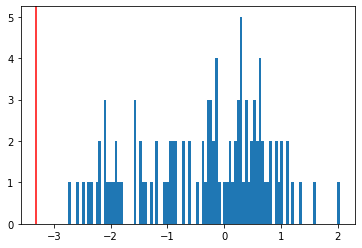

In [278]:
plt.hist(np.log2(sf_MISC[sf_MISC>0]), bins = 100)
plt.axvline(np.log2(0.1), color = 'red')

In [279]:
len(sf_MISC)

105

In [280]:
c_rem = sf_MISC[sf_MISC<0.1].index
c_sel = sf_MISC[sf_MISC>=0.1].index

In [281]:
len(c_rem)

0

In [282]:
len(c_sel)

105

In [283]:
X = X[c_sel]

In [284]:
cl_1st_tmp = pd.Series(X_1st.obs['cl_1st'], index = X_1st.obs_names).astype(str)
cl_1st_tmp[c_rem] = 'JUNK'

## Feature selection


Dropping unexpressed genes from dataset

After mean expression cutoff of 0.025, 2981 genes remain

After high variance feature selection, 1000 genes remain


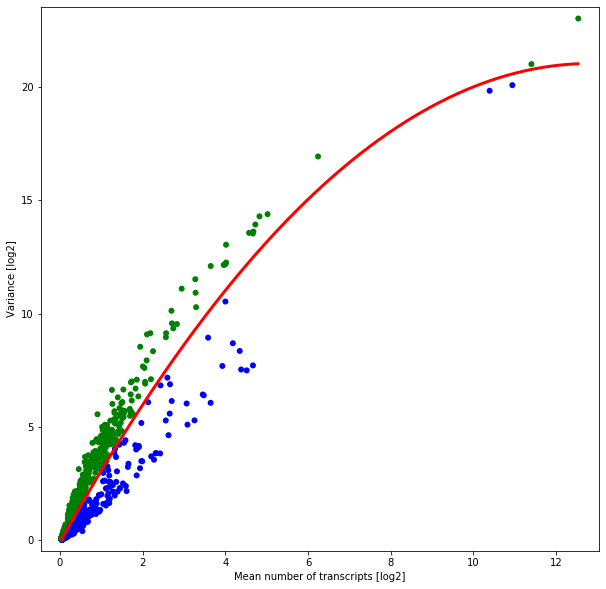

In [285]:
g_sel = select_features_log2_var_polyfit_v2(sc2pd(X, 'raw'), 0.025, 1000).index

In [286]:
Xs = X[:,g_sel]

In [287]:
Xs.X = Xs.layers['norm_log']

## Dimensionality reduction

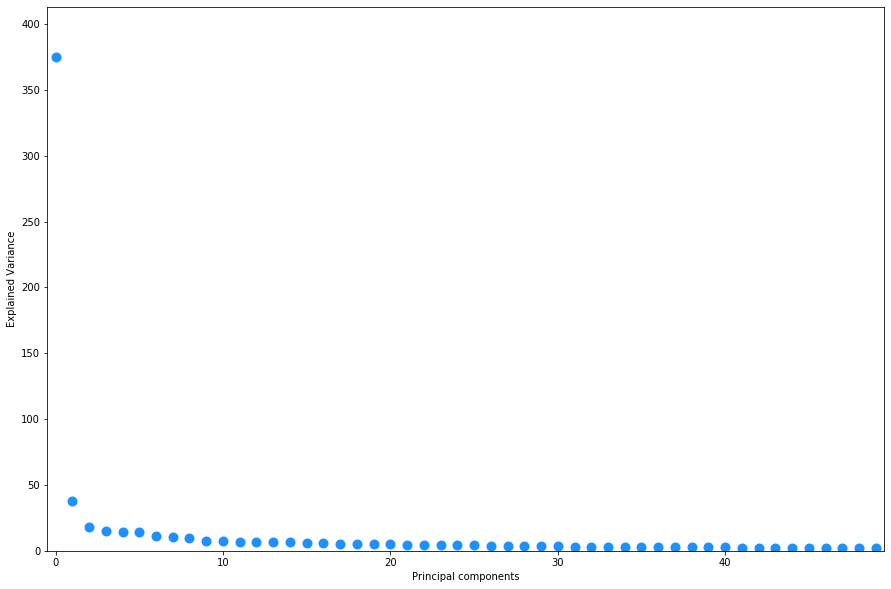

In [288]:
pca_explained_var(sc2pd(Xs,'norm_log'))

In [289]:
sc.pp.pca(Xs, n_comps = 50)

## k nearest neighbors

In [293]:
sc.pp.neighbors(Xs, n_neighbors=10, n_pcs=5, metric='euclidean')

## UMAP

In [296]:
sc.tl.umap(Xs, min_dist=1, spread=3)

/Users/simjoo/anaconda/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


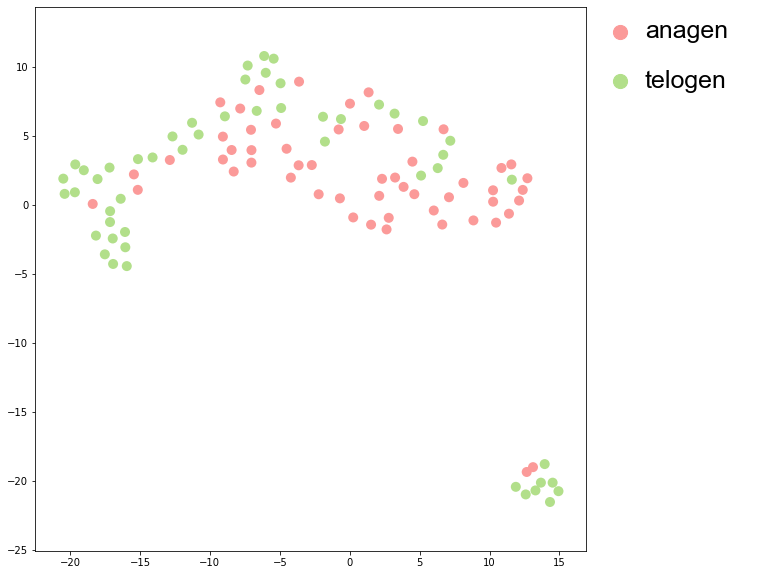

In [297]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['stage'], 
                    {'telogen':'#b2df8a', 'anagen':'#fb9a99'}, s=100)

## Leiden clustering

In [303]:
sc.tl.leiden(Xs, resolution = 0.05)

In [304]:
len(set(Xs.obs['leiden']))

2

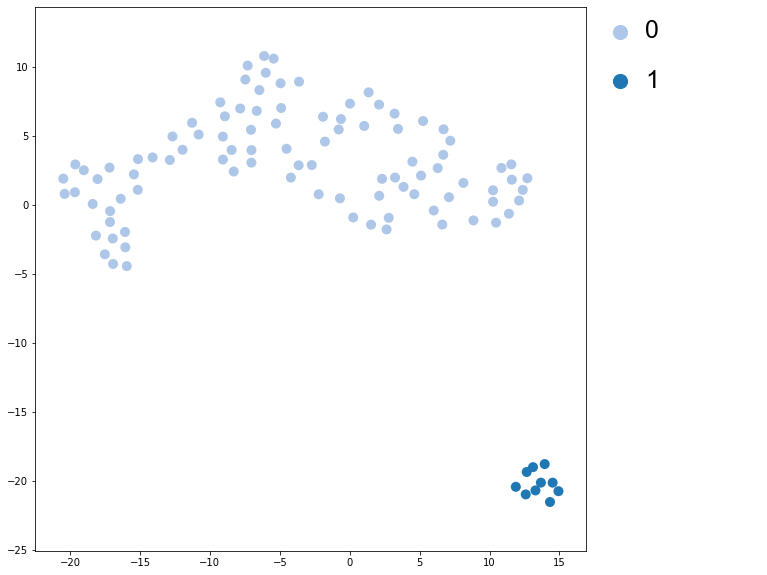

In [305]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['leiden'], 
                    s=100)

## Assign clusters according to identity (based on typical markers from the main dataset)

In [309]:
cl_2nd_MISC = pd.Series(None, index = Xs.obs['leiden'].index)

# Red blood cells

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['0'])].index
cl_2nd_MISC[c_sel] = 'MISC - RBC'

# Skeletal muscle

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['1'])].index
cl_2nd_MISC[c_sel] = 'MISC - SM'

In [310]:
Counter(cl_2nd_MISC)

Counter({'MISC - SM': 10, 'MISC - RBC': 95})

In [311]:
X.obs['cl_2nd_MISC'] = cl_2nd_MISC
Xs.obs['cl_2nd_MISC'] = cl_2nd_MISC

In [312]:
cmap_MISC = {'MISC - RBC':'#1b9e77',
             'MISC - SM':'#d95f02',}

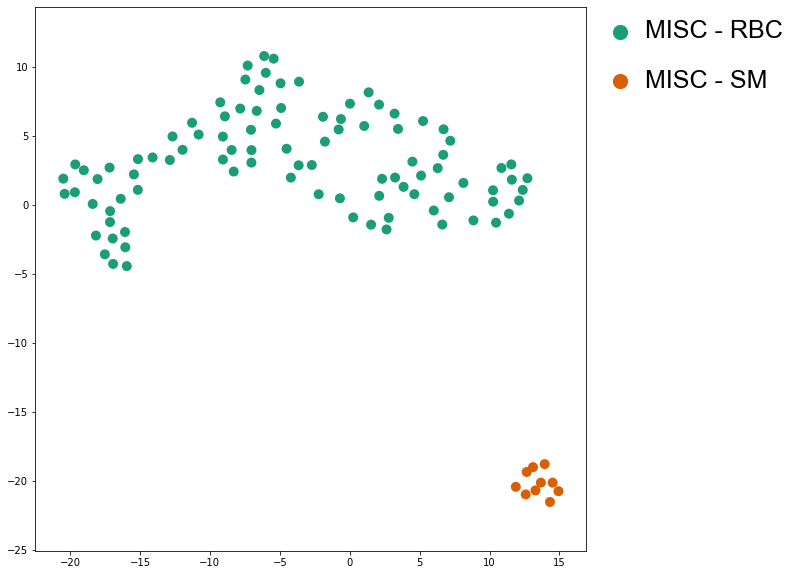

In [313]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['cl_2nd_MISC'],
                    cmap_MISC,
                    s=100)

## Checkpoint

In [315]:
#X.write_h5ad('%s/%s_X_MKnew_2nd_MISC.h5' % (path_output, exp_id))
#Xs.write_h5ad('%s/%s_Xs_MKnew_2nd_MISC.h5' % (path_output, exp_id))

## Update X_1st

In [316]:
X_1st.obs['cl_1st'] = cl_1st_tmp

In [317]:
#X_1st.write_h5ad('%s/%s_X_MKnew_1st.h5' % (path_output, exp_id))

... storing 'cl_1st' as categorical


# Reperform 1st level clustering

In [318]:
X_1st = sc.read_h5ad('%s/%s_X_MKnew_1st.h5' % (path_output, exp_id))

## Select cells not defined as JUNK

In [319]:
c_sel_1st = X_1st.obs['cl_1st'][X_1st.obs['cl_1st']!='JUNK'].index

In [320]:
len(c_sel_1st)

7601

In [322]:
X = X_1st[c_sel_1st]

## Feature selection


Dropping unexpressed genes from dataset

After mean expression cutoff of 0.025, 12970 genes remain

After high variance feature selection, 2500 genes remain


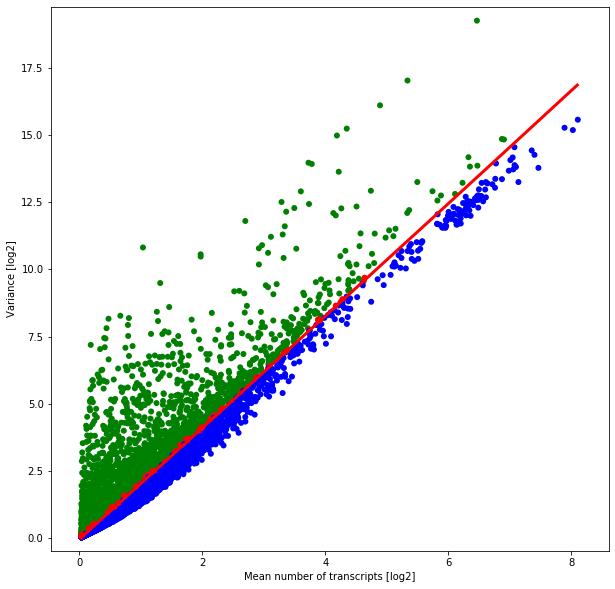

In [326]:
g_sel = select_features_log2_var_polyfit_v2(sc2pd(X, 'raw'), 0.025, 2500).index

In [327]:
Xs = X[:,g_sel]

In [328]:
Xs.X = Xs.layers['norm_log']

## Dimensionality reduction

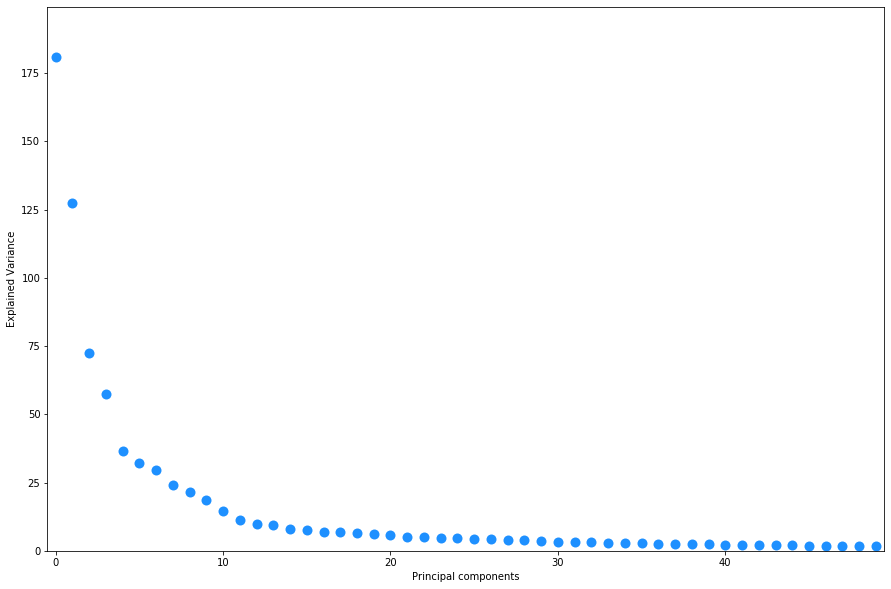

In [329]:
pca_explained_var(sc2pd(Xs,'norm_log'))

In [330]:
sc.pp.pca(Xs, n_comps = 50)

## k nearest neighbors

In [339]:
sc.pp.neighbors(Xs, n_neighbors=30, n_pcs=20, metric='euclidean')

## UMAP

In [340]:
sc.tl.umap(Xs, min_dist=0.5, spread=3)

/Users/simjoo/anaconda/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


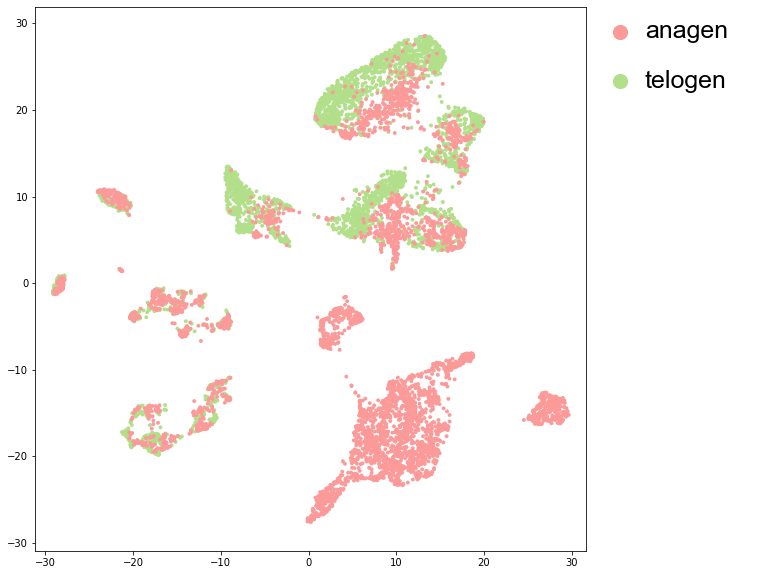

In [345]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['stage'], 
                    {'telogen':'#b2df8a', 'anagen':'#fb9a99'}, s=15)

## 1st level clustering

In [342]:
cmap_1st = {'EPI':'#1b9e77',
            'ANA':'#d95f02',
            'FIB':'#7570b3',
            'IMM':'#e7298a',
            'VASC':'#66a61e',
            'NC':'#e6ab02',
            'MISC':'#666666'}

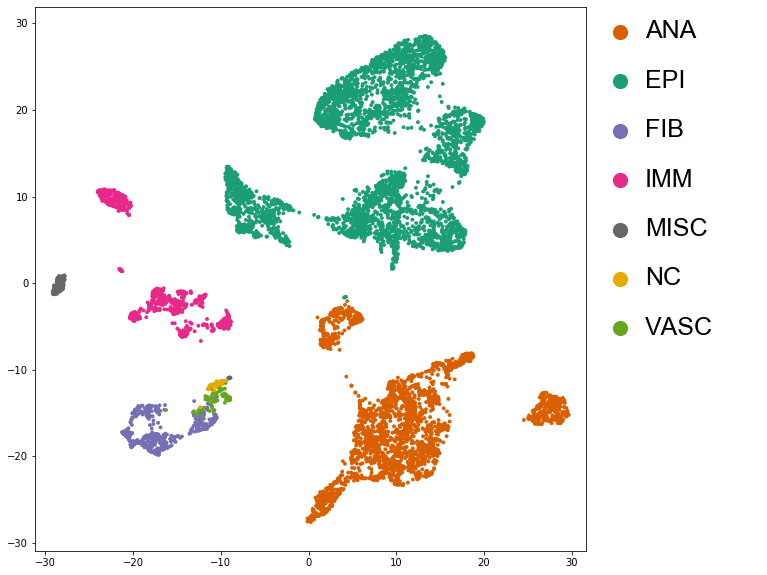

In [344]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['cl_1st'], 
                    cmap_1st, s=15)

## Checkpoint

In [346]:
#X.write_h5ad('%s/%s_X_MKnew_1st_v2.h5' % (path_output, exp_id))
#Xs.write_h5ad('%s/%s_Xs_MKnew_1st_v2.h5' % (path_output, exp_id))

# logit classification - 1st level clustering

In [128]:
from sklearn.linear_model import LogisticRegressionCV

In [137]:
X = sc.read_h5ad('%s/%s_Xcomb_raw.h5' % (path_output, exp_id))

In [138]:
X_train = X[X.obs['study'][X.obs['study']=='MKold'].index]

In [139]:
dat_train = X_train.layers['norm_log']

In [140]:
cl_train = X_train.obs['cl_1st'].values

In [141]:
LR = LogisticRegressionCV(Cs=30, 
                          fit_intercept=True, 
                          cv=10, dual=False, 
                          penalty='l1',
                          scoring=None, 
                          solver='liblinear', 
                          tol=0.0001, 
                          max_iter=1000, 
                          class_weight=None, 
                          n_jobs=1, verbose=0, 
                          refit=True, 
                          intercept_scaling=1.0, 
                          multi_class='ovr',
                          random_state=None)

In [142]:
LR.fit(dat_train, cl_train)

LogisticRegressionCV(Cs=30, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

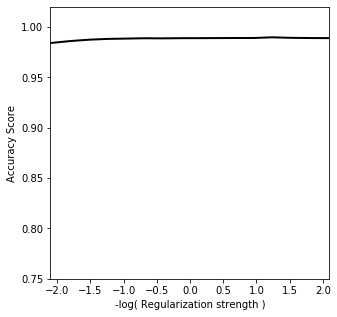

In [85]:
plt.figure(figsize=(5,5))
ax = plt.subplot(111)

ax.set_ylabel('Accuracy Score')
ax.set_xlabel('-log( Regularization strength )')
ax.set_xlim(-2.1,2.1)
ax.set_ylim(0.75,1.02)

ax.plot(np.log10(LR.Cs_), np.mean([LR.scores_[i].mean(0) for i in set(X_train.obs['cl_1st'])],axis=0), c='k', lw=2 )

In [89]:
cmap_1st = {'EPI':'#1b9e77',
            'ANA':'#d95f02',
            'FIB':'#7570b3',
            'IMM':'#e7298a',
            'VASC':'#66a61e',
            'MEL':'#e6ab02',
            'MISC':'#666666'}

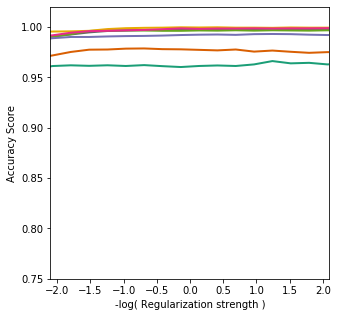

In [90]:
plt.figure(figsize=(5,5))
ax = plt.subplot(111)

ax.set_ylabel('Accuracy Score')
ax.set_xlabel('-log( Regularization strength )')
ax.set_xlim(-2.1,2.1)
ax.set_ylim(0.75,1.02)

for i in set(X_train.obs['cl_1st']):
    ax.plot(np.log10(LR.Cs_), LR.scores_[i].mean(0), lw=2, c = cmap_1st[i])

In [91]:
X_pred = X[X.obs['study'][X.obs['study']=='MKnew'].index]

In [93]:
dat_pred = X_pred.layers['norm_log']

In [110]:
logit_1st = pd.DataFrame(LR.predict_proba(dat_pred).T, index = LR.classes_, columns = X_pred.obs_names)
logit_1st.loc['pred'] = LR.predict(dat_pred)

## Checkpoint

In [112]:
#saveData_v1(logit_1st, path_output, exp_id, 'MKnew_logit_1st')

# logit classification - 2nd level clustering

In [113]:
X = sc.read_h5ad('%s/%s_Xcomb_raw.h5' % (path_output, exp_id))

In [116]:
cl_c_2nd = loadData_v1(path_output, exp_id, 'cl_c_2nd', 'Series')

In [114]:
X_train = X[X.obs['study'][X.obs['study']=='MKold'].index]

In [115]:
dat_train = X_train.layers['norm_log']

In [117]:
cl_train = cl_c_2nd[X_train.obs_names]

In [118]:
LR = LogisticRegressionCV(Cs=30, 
                          fit_intercept=True, 
                          cv=10, dual=False, 
                          penalty='l1',
                          scoring=None, 
                          solver='liblinear', 
                          tol=0.0001, 
                          max_iter=1000, 
                          class_weight=None, 
                          n_jobs=1, verbose=0, 
                          refit=True, 
                          intercept_scaling=1.0, 
                          multi_class='ovr',
                          random_state=None)

In [119]:
LR.fit(dat_train, cl_train)

/Users/simjoo/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


LogisticRegressionCV(Cs=30, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

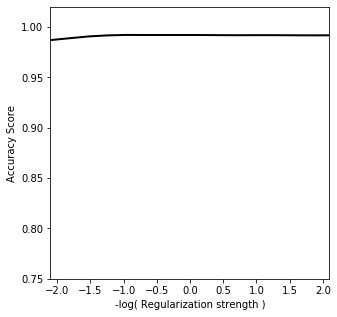

In [121]:
plt.figure(figsize=(5,5))
ax = plt.subplot(111)

ax.set_ylabel('Accuracy Score')
ax.set_xlabel('-log( Regularization strength )')
ax.set_xlim(-2.1,2.1)
ax.set_ylim(0.75,1.02)

ax.plot(np.log10(LR.Cs_), np.mean([LR.scores_[i].mean(0) for i in set(cl_train)],axis=0), c='k', lw=2 )

In [122]:
path = '%s/%s_cmap_2nd.pkl' % (path_output, exp_id)
f = open(path, 'rb')
cmap_2nd = pickle.load(f)

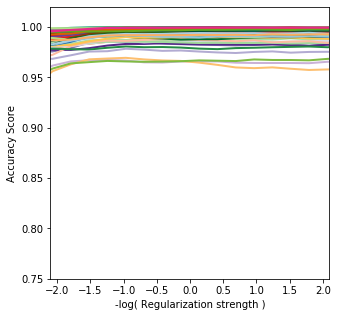

In [127]:
plt.figure(figsize=(5,5))
ax = plt.subplot(111)

ax.set_ylabel('Accuracy Score')
ax.set_xlabel('-log( Regularization strength )')
ax.set_xlim(-2.1,2.1)
ax.set_ylim(0.75,1.02)

for i in set(cl_train):
    ax.plot(np.log10(LR.Cs_), LR.scores_[i].mean(0), lw=2, c = cmap_2nd[i])

In [128]:
X_pred = X[X.obs['study'][X.obs['study']=='MKnew'].index]

In [129]:
dat_pred = X_pred.layers['norm_log']

In [130]:
logit_2nd = pd.DataFrame(LR.predict_proba(dat_pred).T, index = LR.classes_, columns = X_pred.obs_names)
logit_2nd.loc['pred'] = LR.predict(dat_pred)

## Checkpoint

In [135]:
#saveData_v1(logit_2nd, path_output, exp_id, 'MKnew_logit_2nd')

# Subclustering of DP / DS

In [462]:
X = sc.read_h5ad('%s/%s_X_MKnew_2nd_FIB.h5' % (path_output, exp_id))
Xs = sc.read_h5ad('%s/%s_Xs_MKnew_2nd_FIB.h5' % (path_output, exp_id))

## Recluster to clearly separate Ramp1 bridge

In [463]:
sc.tl.leiden(Xs, resolution = 1.5)

In [464]:
len(set(Xs.obs['leiden']))

11

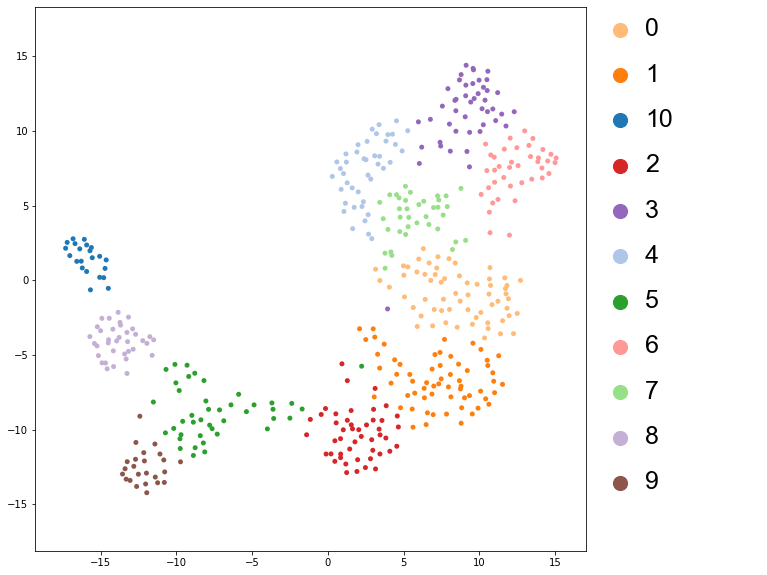

In [465]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['leiden'], 
                    s=25)

## Select DP + DS

In [466]:
c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['10','8','5','9'])].index

In [467]:
len(c_sel)

124

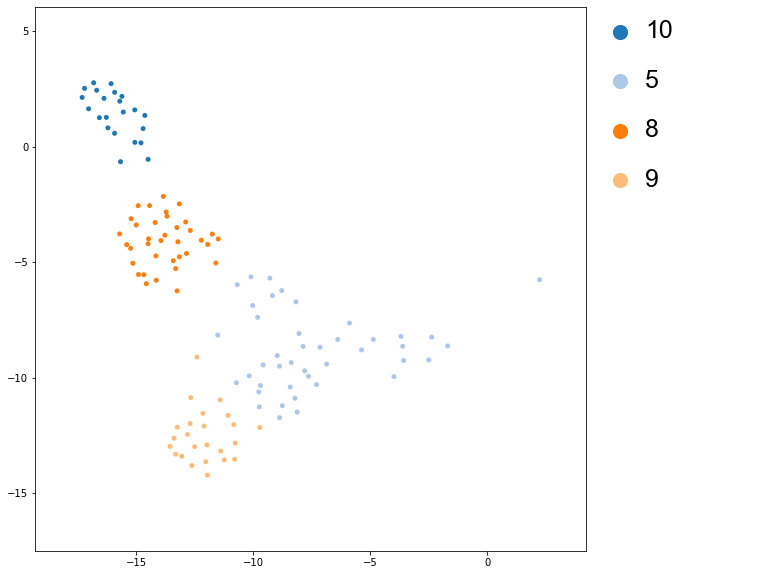

In [468]:
draw_scatter_groups(Xs[c_sel].obsm['X_umap'], 
                    Xs[c_sel].obs['leiden'], 
                    s=25)

In [469]:
X = X[c_sel]

## Feature selection


Dropping unexpressed genes from dataset

After mean expression cutoff of 0.025, 11038 genes remain

After high variance feature selection, 2500 genes remain


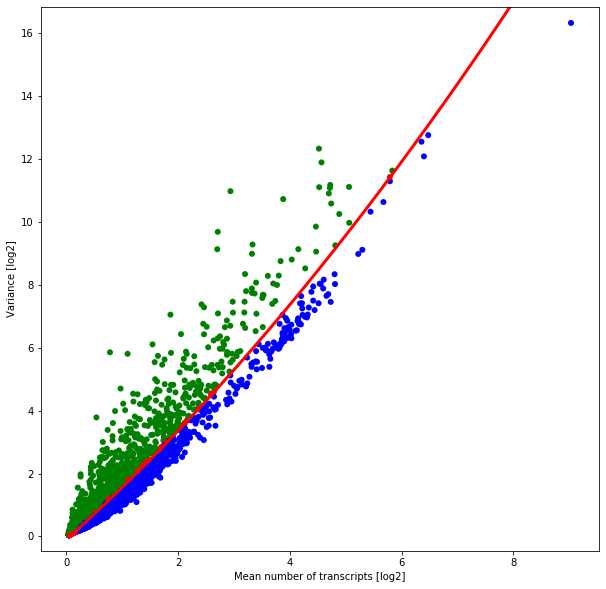

In [470]:
g_sel = select_features_log2_var_polyfit_v2(sc2pd(X, 'raw'), 0.025, 2500).index

In [471]:
Xs = X[:,g_sel]

In [472]:
Xs.X = Xs.layers['norm_log']

## Regress out immediate early genes

In [473]:
genes_IE = ['Nfkbia','Fos','Junb','Egfr1','Atf3']

In [474]:
sc.tl.score_genes(Xs, genes_IE, score_name='IEG_score')

In [475]:
sc.pp.regress_out(Xs, keys=['IEG_score'])

## Dimensionality reduction

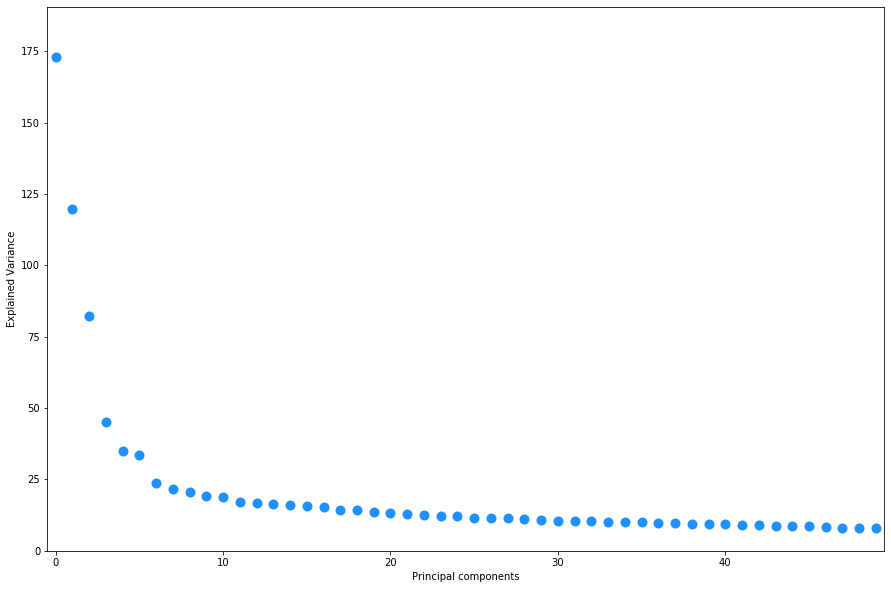

In [477]:
pca_explained_var(sc2pd(Xs,'norm_log'))

In [478]:
sc.pp.pca(Xs, n_comps = 50)

## k nearest neighbors

In [496]:
sc.pp.neighbors(Xs, n_neighbors=25, n_pcs=10, metric='euclidean')

## UMAP

In [519]:
sc.tl.umap(Xs, min_dist=1, spread=3)

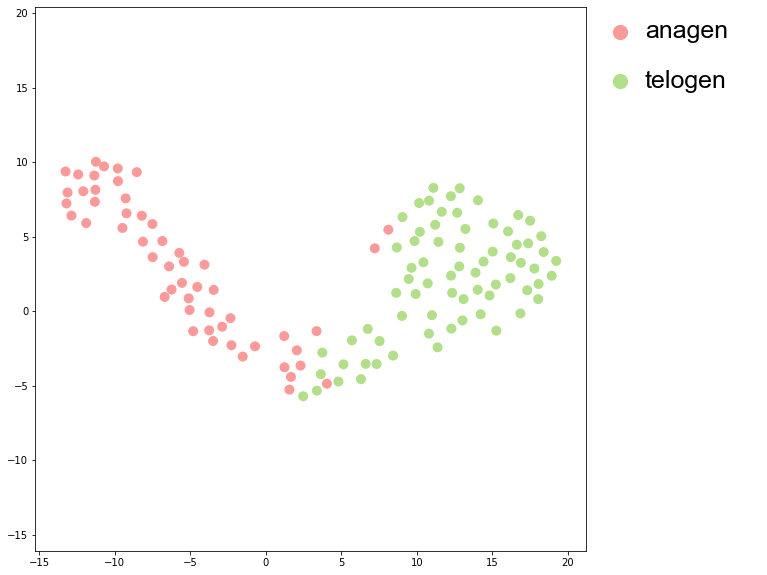

In [520]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['stage'], 
                    {'telogen':'#b2df8a', 'anagen':'#fb9a99'}, s=100)

## Leiden clustering

In [521]:
sc.tl.leiden(Xs, resolution = 0.7)

In [522]:
len(set(Xs.obs['leiden']))

4

In [523]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['leiden'], 
                    s=100)

## Assign clusters according to identity

In [525]:
cl_2nd_FIB_DPDS = pd.Series(None, index = Xs.obs['leiden'].index)

# telogen DP 1

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['0'])].index
cl_2nd_FIB_DPDS[c_sel] = 'FIB - tDP'

# dermal sheath 1

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['2'])].index
cl_2nd_FIB_DPDS[c_sel] = 'FIB - DS1'

# dermal sheath 2

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['1'])].index
cl_2nd_FIB_DPDS[c_sel] = 'FIB - DS2'

# dermal sheath 2

c_sel = Xs.obs['leiden'][Xs.obs['leiden'].isin(['3'])].index
cl_2nd_FIB_DPDS[c_sel] = 'FIB - aDP'

In [526]:
Counter(cl_2nd_FIB_DPDS)

Counter({'FIB - tDP': 60, 'FIB - DS1': 21, 'FIB - aDP': 21, 'FIB - DS2': 22})

In [527]:
X.obs['cl_2nd_FIB_DPDS'] = cl_2nd_FIB_DPDS
Xs.obs['cl_2nd_FIB_DPDS'] = cl_2nd_FIB_DPDS

In [532]:
cmap_FIB_DPDS = {
            'FIB - tDP':'#6a3d9a',
            'FIB - DS1':'#e78ac3',
            'FIB - DS2':'#e7298a',
            'FIB - aDP':'#8e0152',}

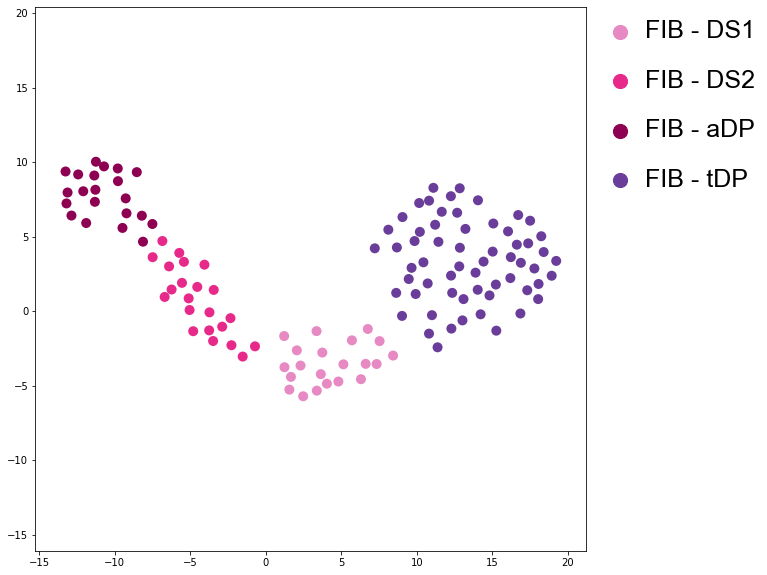

In [533]:
draw_scatter_groups(Xs.obsm['X_umap'], 
                    Xs.obs['cl_2nd_FIB_DPDS'],
                    cmap_FIB_DPDS,
                    s=100)

## Reorder clusters

In [534]:
gr_order = ['FIB - DS1',
            'FIB - DS2',
            'FIB - aDP',
            'FIB - tDP']

In [535]:
cl_2nd_FIB_DPDS = AP_groups_reorder_v2(Xs.obs['cl_2nd_FIB_DPDS'], gr_order)

In [536]:
pca_DPDS = pd.DataFrame(Xs.obsm['X_pca'][:,0:10], index=Xs.obs_names)

In [537]:
dist_DPDS = PTO_pairwise_distance_eucl(pca_DPDS)

In [538]:
cl_2nd_FIB_DPDS = AP_order_incluster(dist_DPDS, cl_2nd_FIB_DPDS, method='ward')

In [539]:
X = X[cl_2nd_FIB_DPDS.index]
Xs = Xs[cl_2nd_FIB_DPDS.index]

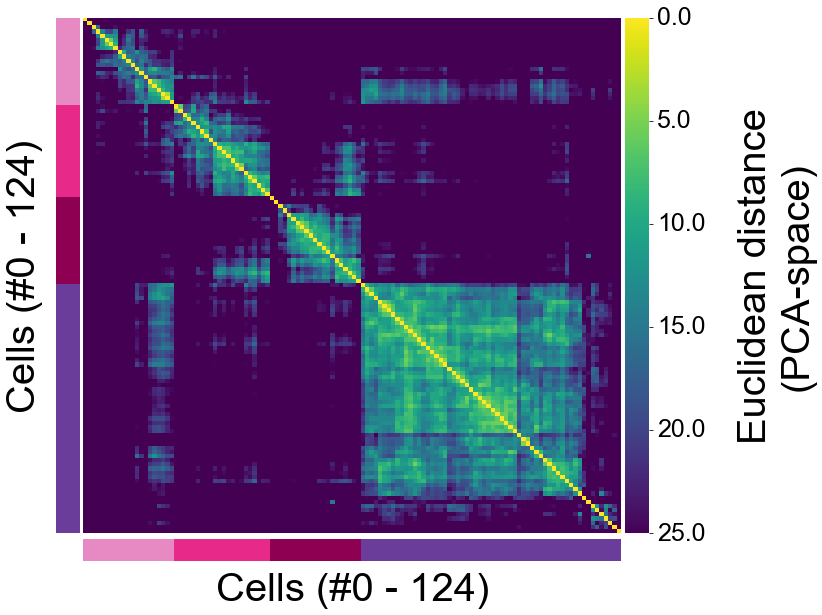

In [540]:
groups = cl_2nd_FIB_DPDS
dist = dist_DPDS
dist = dist.loc[groups.index, groups.index]
vmin = 0
vmax = 25
cmap = plt.cm.viridis_r
cmap_groups = cmap_FIB_DPDS

#generate figure

fig = plt.figure(facecolor = 'w', figsize = (10.625, 10))
gs = plt.GridSpec(nrows = 2, ncols = 3, wspace=0.02, hspace=0.02, width_ratios=[0.5 , 11.25, 0.5], height_ratios=[11.25, 0.5])

#plot heatmap

axHM = plt.subplot(gs[0, 1])

axHM.matshow(dist, cmap = cmap, aspect = 'auto', vmin = vmin, vmax = vmax, interpolation = None)
    
axHM.set_xlabel('Cells (#0 - %s)' % len(groups), family = 'Arial', fontsize = 40)
axHM.set_ylabel('Cells (#0 - %s)' % len(groups), family = 'Arial', fontsize = 40)

axHM.xaxis.set_label_coords(0.5, -0.075)
axHM.yaxis.set_label_coords(-0.075, 0.5)
    
axHM.set_yticks([])

clean_axis(axHM)

#plot left sample groups

axSG1 = plt.subplot(gs[0, 0])

axSG1.set_ylim(len(groups), 0)

for pos, gr in enumerate(groups):
    axSG1.axhspan(pos, pos+1, color=cmap_groups[gr])
    
remove_ticks(axSG1)
clean_axis(axSG1)

#plot bottom sample groups

axSG2 = plt.subplot(gs[1, 1])

axSG2.set_xlim(0, len(groups))

for pos, gr in enumerate(groups):
    axSG2.axvspan(pos, pos+1, color=cmap_groups[gr])

remove_ticks(axSG2)
clean_axis(axSG2)

#plot label

axLabel = plt.subplot(gs[0,2])

axLabel.matshow(np.matrix(np.arange(vmin, vmax, 0.1)).T,
                cmap = cmap, aspect = 'auto', vmin = vmin, vmax = vmax)

axLabel.xaxis.set_ticks([])
axLabel.yaxis.set_ticks_position('right')

clean_axis(axLabel)

axLabel.set_yticks(np.linspace(axLabel.get_ylim()[0], axLabel.get_ylim()[1], 6))
axLabel.set_yticklabels(np.linspace(vmax, vmin, 6), family = 'Arial', fontsize = 25, va = 'center')
axLabel.tick_params(axis='y', which='major', pad=5)

axLabel.set_ylabel('Euclidean distance\n(PCA-space)', family = 'Arial', fontsize = 40)
axLabel.yaxis.set_label_coords(8, 0.5)

## Checkpoint

In [541]:
#X.write_h5ad('%s/%s_X_MKnew_2nd_FIB_DPDS.h5' % (path_output, exp_id))
#Xs.write_h5ad('%s/%s_Xs_MKnew_2nd_FIB_DPDS.h5' % (path_output, exp_id))

... storing 'cl_2nd_FIB_DPDS' as categorical
... storing 'cl_2nd_FIB_DPDS' as categorical


# Differentially expressed genes

In [542]:
genes_sel = dropNull_v2X(sc2pd(X, 'norm_log'), None, 0.01).index


Dropping unexpressed genes from dataset


In [543]:
len(genes_sel)

13254

In [544]:
mwu_av_FIB_DPDS = MWU_vs_average(sc2pd(X, 'norm_log'), X.obs['cl_2nd_FIB_DPDS'], genes_sel, dview)

In [545]:
mwu_gr_FIB_DPDS = MWU_vs_groups(sc2pd(X, 'norm_log'), X.obs['cl_2nd_FIB_DPDS'], genes_sel, dview)

## Checkpoint

In [546]:
#saveData_v1(mwu_av_FIB_DPDS, path_output, exp_id, 'mwu_av_FIB_DPDS')
#saveData_v1(mwu_gr_FIB_DPDS, path_output, exp_id, 'mwu_gr_FIB_DPDS')